**Part 1:** 

Use the **Fashion-MNIST** dataset for this question.

1) Load the dataset and perform splitting into training and validation sets with 70:30 ratio.

> Do we need to normalise data? [If so Does it make any difference?]

2) Implement the K Means algorithm. You need to find the optimal number of clusters using the
    elbow method and silhouette method. 

3) Define the initial clusters’ centroids using:</br>
> i) Forgy</br>

> ii) Random Partition

4) Experiment with different distance measures[Euclidean distance, Manhattan distance].

5) Plot the error vs number of clusters graph while using the elbow method and silhouette 
    method. Report the optimal number of clusters found.

6) Report the training and the validation accuracy and Compare your trained model with a model trained by the scikit-learn

7) Visualize the dataset to depict the clusters formed. #Prefer T-SNE

8) Implement K-means++, and repeat task 1 to task 7 again.</br>
</br>
</br>
</br>
</br>
**Part 2:**
</br>
In this task, you will perform operations on `[data.csv](https://drive.google.com/file/d/15NPkfXFoTkiRBlcI4ffe_Lp_BFOyf8UY/view?usp=sharing)`, data.csv is a  latent space representation of  Fashion-MNIST, before doing this task please read about latent space representation.

9) Load the data.csv file and apply Kmeans and Kmeans++, You need to find the optimal number of clusters using the elbow method and silhouette method.

10) Visualize the dataset to depict the clusters formed. # Prefer T-SNE

11) From these experiments(Part 1 and Part 2), compare accuracy or error, and report which one is better and why?
</br>
</br>
**Note:** If the model takes a lot of time to train you can use MiniBatchKMeans.
 




#### Necessary imports

In [ ]:
from sklearn import preprocessing
from sklearn.cluster import MiniBatchKMeans
import sklearn
import random
from numpy.random import permutation
import pandas as pd
import numpy as np 
from math import sqrt 
from prettytable import PrettyTable
from sklearn.model_selection import train_test_split
import math
from scipy.stats import pearsonr
from scipy.spatial import distance
from sklearn.cluster import KMeans
import sys
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.metrics import silhouette_samples,silhouette_score
import matplotlib.cm as cm
from sklearn.metrics.cluster import homogeneity_score
# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')


#### Distance 

In [ ]:
def euclidean_distance(row1, row2):
  """ Calculates the l2 distance between two vectors """
    
  # Squared distance between each coordinate
  
  return sqrt(sum((element1-element2)**2 for element1,element2 in zip(row1,row2)))
  #return np.argmin(distance.cdist(X, centroids, 'euclidean'),axis=1)

def manhatten_distance(row1, row2):
  
  # City block distance between each coordinate
  
  return sum(abs(element1-element2) for element1,element2 in zip(row1,row2))

  #return P = np.argmin(distance.cdist(X, centroids, 'cityblock'),axis=1)




#### Algorithms definition -kmeans

In [ ]:
#implement Kmeans from scratch

# some of the references were taken from the following website
# https://gdcoder.com/implementation-of-k-means-from-scratch-in-python-9-lines/

class Kmeans:

  def __init__(self,k=3,max_iterations=300,clustering="forgy",distance="euclidean"):
    self.k=k
    self.max_iterations=max_iterations
    self.clustering=clustering
    if distance=="euclidean":
      self.distance=distance
    else:
      self.distance="cityblock"
    self.clusters=[]
    self._inertia_=0
    self.centroids=[]
    self.classes=[]
    self.labels_=[]



  def _forgy_(self,X):
    ''' Reference: https://medium.com/analytics-vidhya/comparison-of-initialization-strategies-for-k-means-d5ddd8b0350e#:~:text=Random%20Partition%20Method,the%20mean%20of%20the%20Data.'''
    
    indices = np.random.choice(len(X), self.k, replace=False)
    centroids = X[indices, :]
    return centroids

  def _random_partition(self,X):
    ''' Reference: https://medium.com/analytics-vidhya/comparison-of-initialization-strategies-for-k-means-d5ddd8b0350e#:~:text=Random%20Partition%20Method,the%20mean%20of%20the%20Data.'''
    indices=np.random.choice(range(0,self.k),replace=True,size=X.shape[0])
    mean = []
    for count in range(self.k):
        mean.append(X[indices == count].mean(axis=0))
        
    centroids= np.concatenate([val[ None, :] for val in mean], axis = 0)
    return centroids


  def _init_centroid_(self,X):

    if self.clustering=="random_partition":
      ''' If random partition method was passed as an argument while training the model'''
      return self._random_partition(X)

    else:
      ''' Forgy will be assumed automatically'''
      return self._forgy_(X)

  def _nearest_centroid(self,X,centroids): 

    ## need to write our own distance methods

    """ Calculates the nearest centroid to the point """
    if self.distance=="euclidean":
      return np.argmin(distance.cdist(X, centroids, 'euclidean'),axis=1)
    else:
      return np.argmin(distance.cdist(X, centroids, 'cityblock'),axis=1)


    
  def _new_centroids_(self,P,X):
    """ Update the new centroids with the mean of the clusters formed """
   
    return np.vstack([X[P==i,:].mean(axis=0) for i in range(self.k)])


  def _get_labels_samples(self,clusters,X):
    """ assigns labels for each sample point in the X depending on the cluster that sample that belongs to """
    samples,dimensions=np.shape(X)
    y_pred=np.zeros(samples)
    for label,cluster in enumerate(clusters):
      for sample in cluster:
        y_pred[sample]=label   # clusters holds the indexes of the points in the X
    return y_pred

  """ need to define the method inertia """

  def inertia(self,centroids,clusters,X):

    # iterate over each point in cluster and then calculate the sum of squares 
    inertia_=0

    for j,cluster in enumerate(clusters):
      
      for sample in cluster:
        point=X[sample,:]
        inertia_+=np.sum((point - centroids[j])**2)

    self._inertia_=inertia_



  def fit(self,X):

    centroids=self._init_centroid_(X)
    classes=self._nearest_centroid(X,centroids)
    #print(centroids)
    prev_centroids=centroids

    for i in range(self.max_iterations):

      #clusters=self._form_clusters_(centroids,X)


      centroids=self._new_centroids_(classes,X)

      temp_classes=self._nearest_centroid(X,centroids)

      self.centroids=centroids

      if np.array_equal(classes,temp_classes) or np.array_equal(centroids,prev_centroids):
        break
      classes=temp_classes
      prev_centroids=centroids

    clusters=[[] for _ in range(self.k)]

    for index,clas in enumerate(classes):
      clusters[clas].append(index)
    clusters=np.array(clusters)
    self.clusters=clusters
    self.classes=classes

    self.inertia(centroids,clusters,X)

    self.labels_= self._get_labels_samples(self.clusters,X)
    

  

#### Algorithms definition -kmeans++

In [ ]:
#implement Kmeans++ from scratch
class Kmeansplusplus:

  def __init__(self,k=3,max_iterations=500,distance="euclidean",method="pdf"):
    self.k=k
    self.max_iterations=max_iterations
    if distance=="euclidean":
      self.distance=distance
    else:
      self.distance="cityblock"


    #self.clustering=clustering     initialisation methods like forgy and random parition has no sense in this context 
    self.method=method
    self.clusters=[]
    self._inertia_=0
    self.centroids=[]
    self.classes=[]
    self.labels_=[]


  def _init_centroid_(self,X):

    """ Reference :https://www.geeksforgeeks.org/ml-k-means-algorithm/"""

    """ 1) Initialise a random point as first centroid """

    samples,dimensions=np.shape(X)
    centroids=[]
    centroids.append(X[np.random.choice(range(samples))])

    """ compute other centroids by looping over k-1 times """
    for c_id in range(self.k - 1): 
          
        dist = [] 
        for i in range(X.shape[0]): 
            point = X[i, :] 
            d = sys.maxsize 

            for j in range(len(centroids)): 
                temp_dist=np.sum((point - centroids[j])**2)
                d = min(d, temp_dist) 
            dist.append(d) 
              
        distance = np.array(dist) 
        next_centroid = X[np.argmax(distance), :] 
        centroids.append(next_centroid) 
        dist.clear()
    return np.array(centroids)
  

  def _nearest_centroid(self,X,centroids): 

    ## need to write our own distance methods

    """ Calculates the nearest centroid to the point """
    if self.distance=="euclidean":
      return np.argmin(distance.cdist(X, centroids, 'euclidean'),axis=1)
    else:
      return np.argmin(distance.cdist(X, centroids, 'cityblock'),axis=1)


    
  def _new_centroids_(self,P,X):
    """ Update the new centroids with the mean of the clusters formed """
   
    return np.vstack([X[P==i,:].mean(axis=0) for i in range(self.k)])


  def _get_labels_samples(self,clusters,X):
    """ assigns labels for each sample point in the X depending on the cluster that sample that belongs to """
    samples,dimensions=np.shape(X)
    y_pred=np.zeros(samples)
    for label,cluster in enumerate(clusters):
      for sample in cluster:
        y_pred[sample]=label   # clusters holds the indexes of the points in the X
    return y_pred

  """ need to define the method inertia """

  def inertia(self,centroids,clusters,X):

    # iterate over each point in cluster and then calculate the sum of squares 
    inertia_=0

    for j,cluster in enumerate(clusters):
      
      for sample in cluster:
        point=X[sample,:]
        inertia_+=np.sum((point - centroids[j])**2)

    self._inertia_=inertia_



  def fit(self,X):

    centroids=self._init_centroid_(X)
    classes=self._nearest_centroid(X,centroids)
    #print(centroids)
    prev_centroids=centroids

    for i in range(self.max_iterations):

      #clusters=self._form_clusters_(centroids,X)


      centroids=self._new_centroids_(classes,X)

      temp_classes=self._nearest_centroid(X,centroids)

      self.centroids=centroids

      if np.array_equal(classes,temp_classes) or np.array_equal(centroids,prev_centroids):
        break
      classes=temp_classes
      prev_centroids=centroids

    clusters=[[] for _ in range(self.k)]

    for index,clas in enumerate(classes):
      clusters[clas].append(index)
    clusters=np.array(clusters)
    self.clusters=clusters

    self.inertia(centroids,clusters,X)

    self.labels_= self._get_labels_samples(self.clusters,X)


 

#### visualise tsne

In [ ]:
def visualise_tsne(X,y,k,scratch,dist,clust):
  tsne = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=300)
  tsne_results = tsne.fit_transform(X)
  tsne_df_scale = pd.DataFrame(tsne_results, columns=['tsne1', 'tsne2', 'tsne3'])
  inertia=[]
  labels=[]
  if scratch:
    if clust in ("forgy","random_partition","random"):
      kmeans = Kmeans(k,max_iterations=100,clustering=clust,distance=dist)
    else:
      kmeans = Kmeansplusplus(k,max_iterations=100,distance=dist)
    kmeans.fit(tsne_results)
    labels=Kmeans._get_labels_samples
    inertia.append(kmeans._inertia_)
    print("Inertia(With in the cluster sum of squares) is {} ".format(kmeans._inertia_))

    target_ids = range(k)

    plt.figure(figsize=(6, 6))
    colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'w', 'orange', 'purple']
    colors = colors[:k]
    for i, c, label in zip(target_ids, colors, range(k) ):
        plt.scatter(tsne_results[y == i, 0], tsne_results[y == i, 1], c=c, label=label)
    plt.legend()
    plt.show()
  else:
    if not (clust=="k-means++"):
      kmeans_tsne_scale = KMeans(n_clusters = k, init = 'random', max_iter = 100, n_init = 10, random_state = 0)
    else:
      kmeans_tsne_scale = KMeans(n_clusters = k, init = 'k-means++', max_iter = 100, n_init = 10, random_state = 0)
    kmeans_tsne_scale.fit(tsne_df_scale)
    labels=kmeans_tsne_scale.labels_
    inertia.append(kmeans_tsne_scale.inertia_)
    print("Inertia(With in the cluster sum of squares) is {} ".format(kmeans_tsne_scale.inertia_))

    #kmeans_tsne_scale = KMeans(n_clusters=k, n_init=100, max_iter=400, init='k-means++', random_state=42).fit(tsne_df_scale)
    """ Reference https://towardsdatascience.com/explaining-k-means-clustering-5298dc47bad6"""
    print('KMeans tSNE Scaled Silhouette Score: {}'.format(silhouette_score(tsne_df_scale, kmeans_tsne_scale.labels_, metric='euclidean')))
    labels_tsne_scale = kmeans_tsne_scale.labels_
    clusters_tsne_scale = pd.concat([tsne_df_scale, pd.DataFrame({'tsne_clusters':labels_tsne_scale})], axis=1)
    plt.figure(figsize = (6,6))
    sns.scatterplot(clusters_tsne_scale.iloc[:,0],clusters_tsne_scale.iloc[:,1],hue=labels_tsne_scale, palette='Set1', s=100, alpha=0.6).set_title('Cluster Vis tSNE Scaled Data', fontsize=15)
    plt.legend()
    plt.show()




#### elbow method definition

In [ ]:
#implement elbow method from scratch
def elbow(X,y,scratch,dist,clust):

  inertia = []

  for i in range(2, 11):
      if scratch:
        if clust in ("forgy","random_partition"):
          kmeans = Kmeans(k=i,max_iterations=100,clustering=clust,distance=dist)          
        else:
          kmeans = Kmeansplusplus(k=i,max_iterations=100,distance=dist)
        kmeans.fit(X)
        inertia.append(kmeans._inertia_)
        print("Homogeneity score for k= {} is {} ".format(i,homogeneity_score(kmeans.labels_,y)))


      else:
        if not (clust=="k-means++"):
          kmeans = KMeans(n_clusters = i, init = 'random', max_iter = 100, n_init = 10, random_state = 0)
 
        else:
          kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 100, n_init = 10, random_state = 0)
        kmeans.fit(X)
        inertia.append(kmeans.inertia_)
        print("Homogeneity score for k= {} is {} ".format(i,homogeneity_score(kmeans.labels_,y)))

      
      
      print(" k= {} over".format(i),end=" ->")
      
  #Plotting the results onto a line graph, allowing us to observe 'The elbow'
  plt.plot(range(1, 10), inertia)
  plt.title('The elbow method')
  plt.xlabel('Number of clusters')
  plt.ylabel('WCSS') #within cluster sum of squares
  plt.show()


#### silhouette method definition

In [ ]:
def intra_cluster_distance(sample_i,clusters,X,dist):
  present_in=[]
  row1=[X[sample_i]]
  for cluster in clusters:
    if sample_i in cluster:
      present_in=cluster
      break
 
  final_array=[]
  for sample_j in present_in:
    if  not sample_j==sample_i:
      final_array.append(X[sample_j])
  final_array=np.array(final_array)
  row1=np.array(row1)
  return distance.cdist(final_array,row1,metric=dist).mean()

def inter_cluster_distance(sample_i,clusters,X,dist):
  if len(clusters)>1:
    absent_in=[]
    row1=[X[sample_i]]
    for cluster in clusters:
      if not (sample_i in cluster):
        absent_in.append(cluster)
    _mean=[] 
    for cluster in absent_in:
      final_array=[]
      for sample_j in cluster:
        final_array.append(X[sample_j])
      final_array=np.array(final_array)
      row1=np.array(row1)

      _mean.append(distance.cdist(final_array,row1,metric=dist).mean())

    return min(_mean)
  return 0


def silh_coefficient(intra_a,extra_b,clusters):
  silh_means=[]
  for c,cluster in enumerate(clusters):
    silhouette_values=[]
    for sample_j in cluster:
      if len(cluster)>1:
        b=extra_b[sample_j]
        a=intra_a[sample_j]
        silhouette_values.append((b-a)/(max(b,a)))
      else:
        silhouette_values.append(0)
    silh_means.append(np.mean(np.array(silhouette_values)))
  return max(silh_means) 
  


In [ ]:
#implement silhouette method from scratch

""" References:https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py
     """
def silhouette(X,scratch,dist,clust):
  if not (dist=="euclidean"):
    dist="cityblock"

  clusters=[]
  samples,dimensions=np.shape(X)
  range_n_clusters = [2,3,4,5,6,7,8,9,10]
  for n_clusters  in range_n_clusters:
    if scratch:
      if clust in ("forgy","random_partition"):
        kmeans = Kmeans(k=n_clusters,max_iterations=300,clustering=clust,distance=dist)
      else:
        kmeans = Kmeansplusplus(k=n_clusters,max_iterations=100,distance=dist)
            
      kmeans.fit(X)
      #print("fit is over for i={}".format(i))
      clusters=kmeans.clusters
      classes=kmeans.classes

      intra_a=np.zeros(X.shape[0])

      extra_b=np.zeros(X.shape[0])

      for sample_i,sample in enumerate(X):
        intra_a[sample_i]=intra_cluster_distance(sample_i,clusters,X,dist)
        extra_b[sample_i]=inter_cluster_distance(sample_i,clusters,X,dist)

      coeff_=silh_coefficient(intra_a,extra_b,clusters)
      message = "For n_clusters = {} The average silhouette_score is: {}"
      print(message.format(n_clusters, round(coeff_, 4)))
      

    else:
      if not (clust=="k-means++"):
        kmeans = KMeans(n_clusters = n_clusters, init = 'random', max_iter = 100, n_init = 10, random_state = 0)

      else:
        kmeans = KMeans(n_clusters = n_clusters, init = 'k-means++', max_iter = 100, n_init = 10, random_state = 0)
        
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    cluster_labels=[]
    silhouette_avg=0.0

    if not scratch:
      cluster_labels = kmeans.fit_predict(X)
      silhouette_avg = silhouette_score(X, cluster_labels)
    else:
      cluster_labels=kmeans._get_labels_samples(kmeans.clusters,X)
      silhouette_avg =coeff_
      

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    """
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers=[]
    if scratch:
      centers=kmeans.centroids
    else:
      centers = kmeans.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                fontsize=14, fontweight='bold')
    """

    #print(" k= {} over".format(i),end=" ->")

    plt.show()

        

#### Data preprocessing

In [ ]:
from keras.datasets import fashion_mnist
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

print(np.shape(trainX))
print(np.shape(testX))
print(np.shape(trainy))
print(np.shape(testy))

a=np.vstack((trainX,testX))


trainX,testX=a[:int(0.7*int(a.shape[0]))] , a[int(0.7*int(a.shape[0])):]

a=np.concatenate((trainy,testy),axis=0)


trainy,testy=a[:int(0.7*int(a.shape[0]))] , a[int(0.7*int(a.shape[0])):]


4423680/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [ ]:
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

In [ ]:
print(trainX.shape)
print(testX.shape)


(49000, 28, 28, 1)
(21000, 28, 28, 1)
[9 0 0 ... 9 0 3]


In [ ]:
trainX = np.reshape(trainX, (trainX.shape[0], -1))
testX = np.reshape(testX, (testX.shape[0], -1))
trainX=trainX.astype('float32')
testX =testX.astype('float32')

trianX=trainX/255
testX=testX/255
print(trainX.shape, testX.shape)
print(len(trainX))
print(len(testX))
#trainX = random.sample( trainX, trainX.shape[0] )
#testX = random.sample( testX, testX.shape[0] )

'''
num_training = 10000
mask = list(range(num_training))
trainX = trainX[mask]
trainy = trainy[mask]


num_test = 1000
mask = list(range(num_test))
testX = testX[mask]
testy = testy[mask]
'''



(49000, 784) (21000, 784)
49000
21000


'\nnum_training = 10000\nmask = list(range(num_training))\ntrainX = trainX[mask]\ntrainy = trainy[mask]\n\n\nnum_test = 1000\nmask = list(range(num_test))\ntestX = testX[mask]\ntesty = testy[mask]\n'

## Experiments on K-means algorithm 

### Silhouette methods on kmeans (`Custom algorithm`)

For n_clusters = 2 The average silhouette_score is: 0.2953
For n_clusters = 2 The average silhouette_score is : 0.29528663388030607


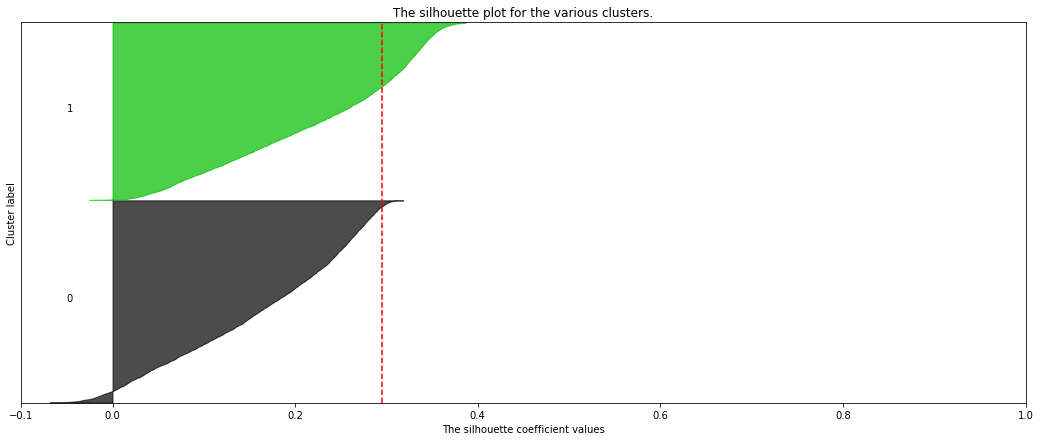

For n_clusters = 3 The average silhouette_score is: 0.2793
For n_clusters = 3 The average silhouette_score is : 0.2792870442810625


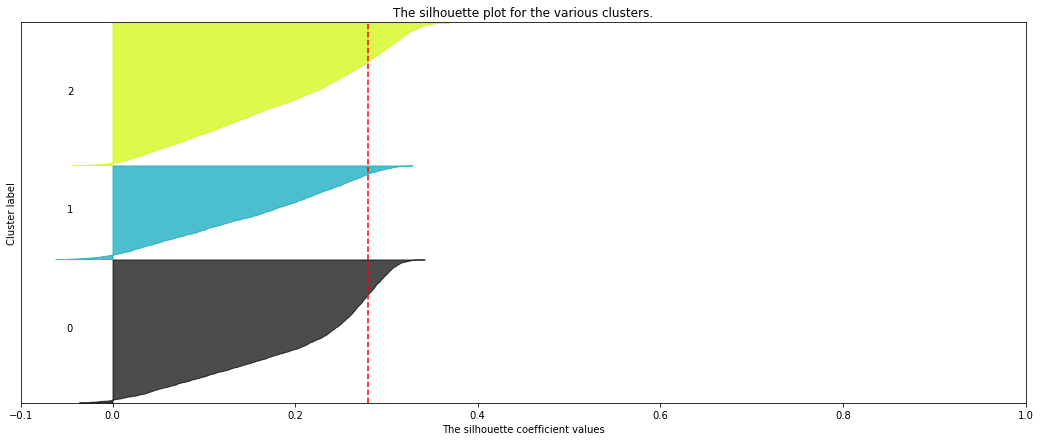

For n_clusters = 4 The average silhouette_score is: 0.277
For n_clusters = 4 The average silhouette_score is : 0.27697478662244684


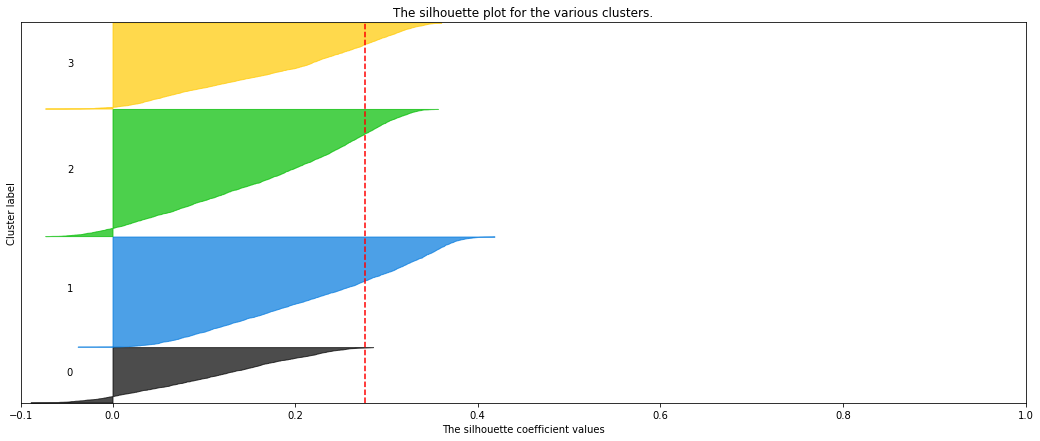

For n_clusters = 5 The average silhouette_score is: 0.2664
For n_clusters = 5 The average silhouette_score is : 0.2663946553309458


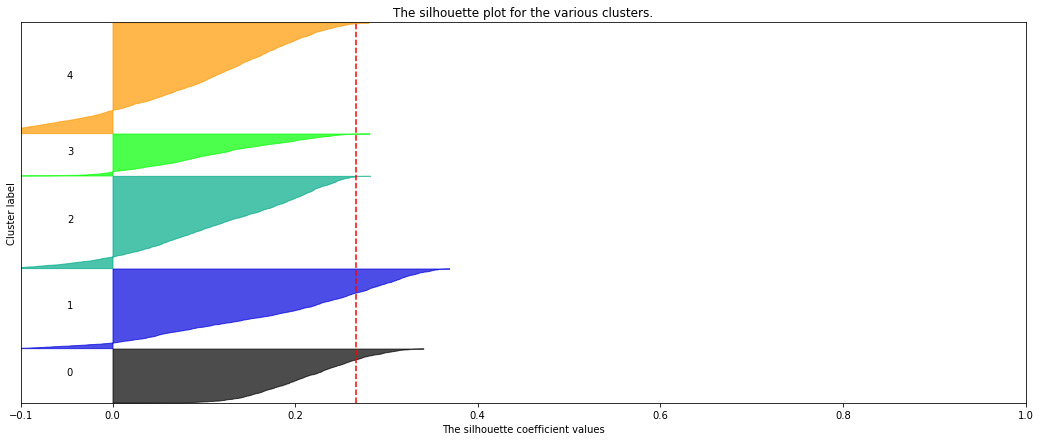

For n_clusters = 6 The average silhouette_score is: 0.2962
For n_clusters = 6 The average silhouette_score is : 0.29624874035687904


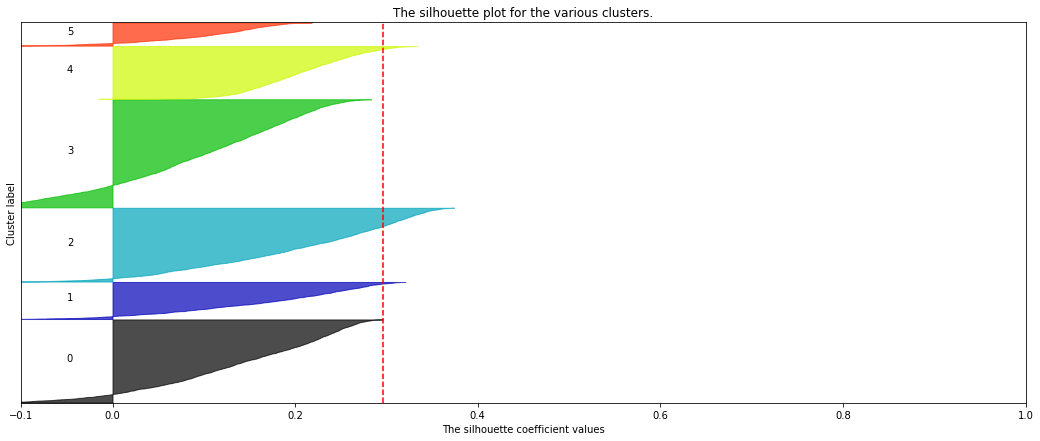

For n_clusters = 7 The average silhouette_score is: 0.301
For n_clusters = 7 The average silhouette_score is : 0.3010007929654634


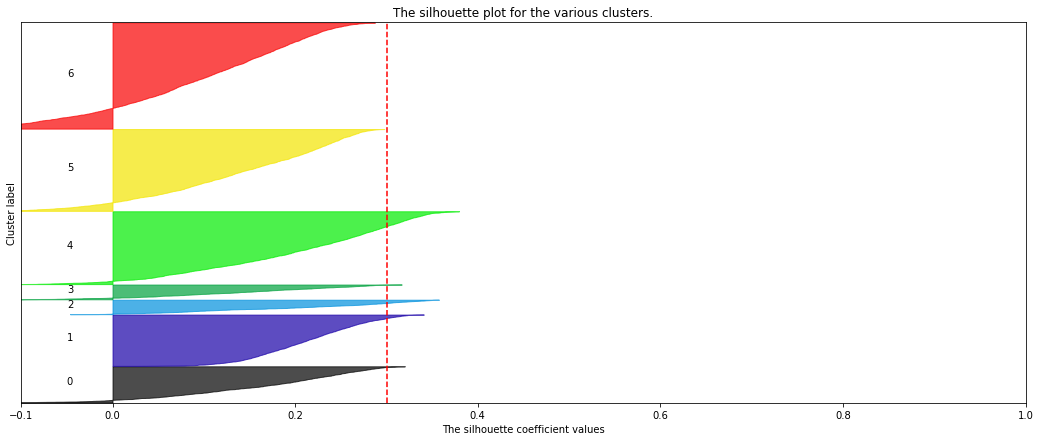

For n_clusters = 8 The average silhouette_score is: 0.2778
For n_clusters = 8 The average silhouette_score is : 0.2777538204583454


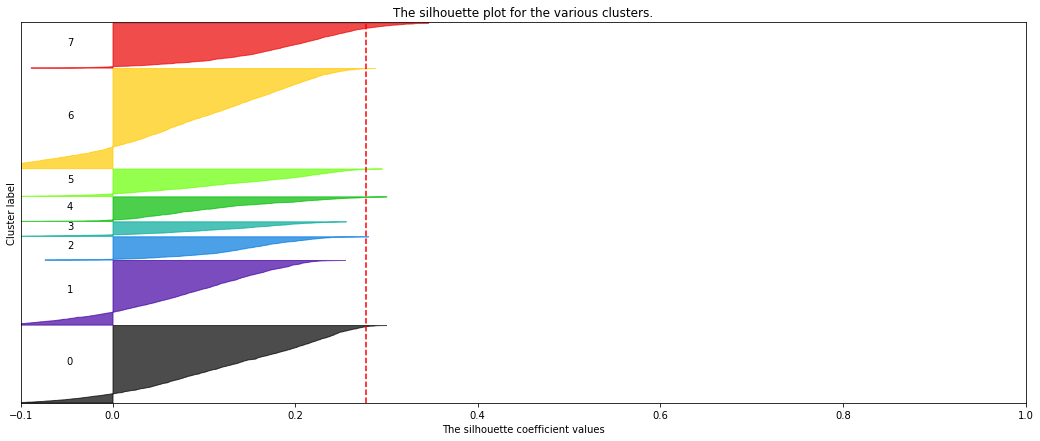

For n_clusters = 9 The average silhouette_score is: 0.2787
For n_clusters = 9 The average silhouette_score is : 0.278718982391721


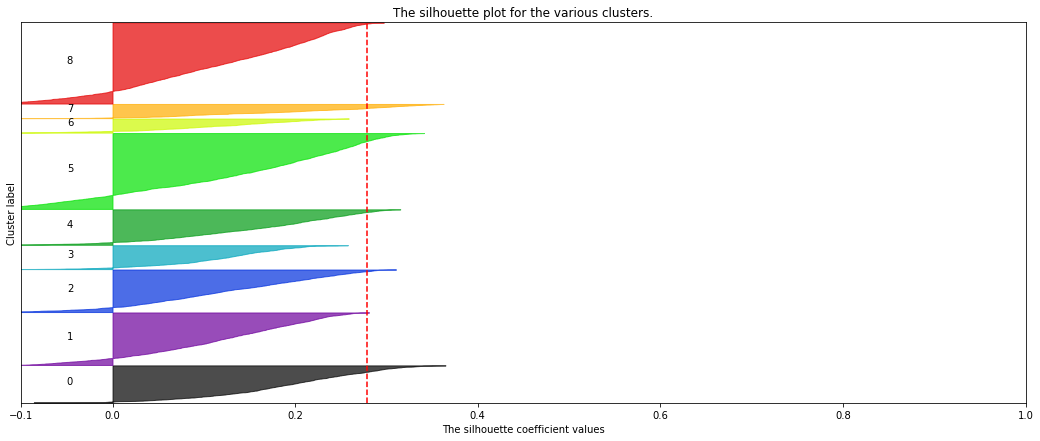

For n_clusters = 10 The average silhouette_score is: 0.2655
For n_clusters = 10 The average silhouette_score is : 0.26551563516679505


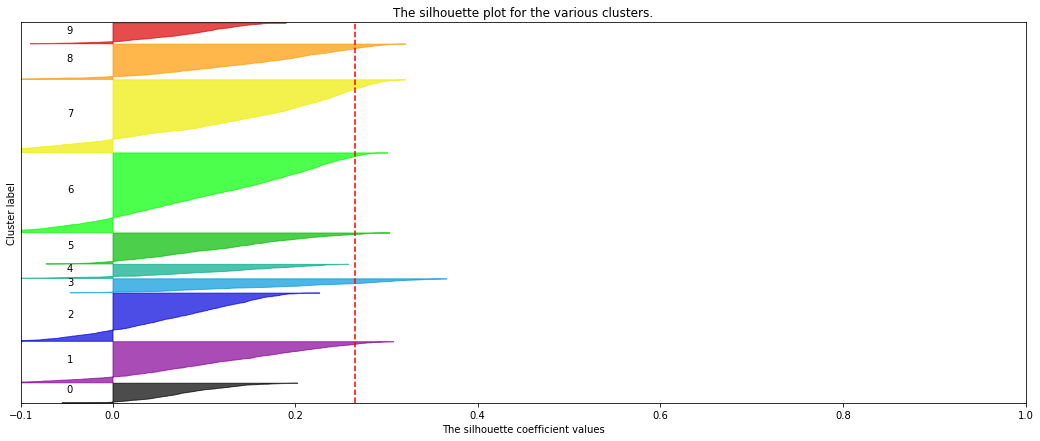

In [ ]:
silhouette(trainX,True,"manhatten","forgy")  # from scratch

#### clearly the silhoutte score is better for n_clusters=7

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.067s...
[t-SNE] Computed neighbors for 1000 samples in 1.979s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 2.665977
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.303490
[t-SNE] KL divergence after 300 iterations: 0.866260


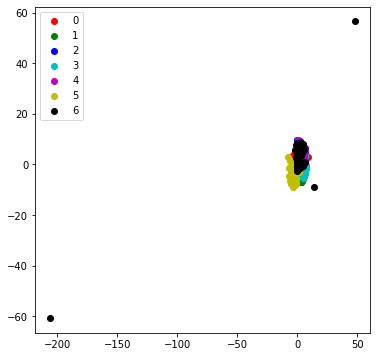

In [ ]:
visualise_tsne(testX,testy,7,True,"manhatten","forgy")

For n_clusters = 2 The average silhouette_score is: 0.2292
For n_clusters = 2 The average silhouette_score is : 0.22920120948901485


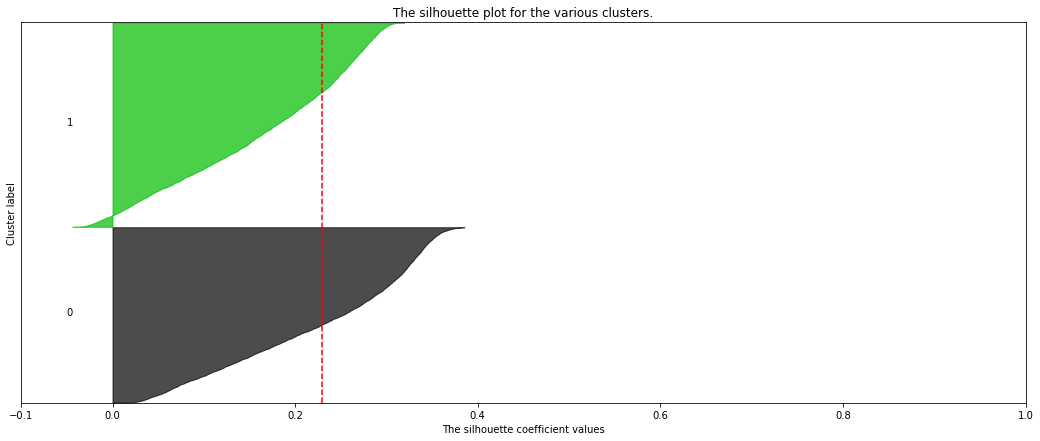

For n_clusters = 3 The average silhouette_score is: 0.2455
For n_clusters = 3 The average silhouette_score is : 0.24552215773806493


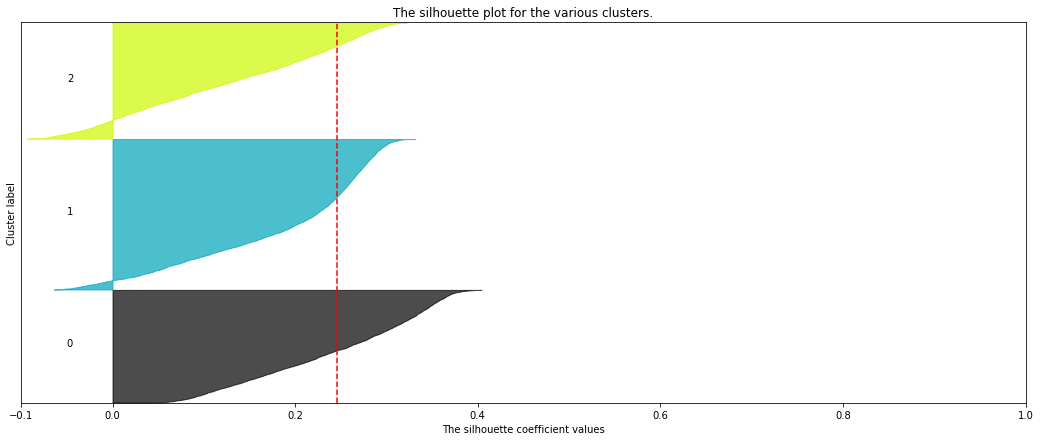

For n_clusters = 4 The average silhouette_score is: 0.2304
For n_clusters = 4 The average silhouette_score is : 0.230406924350794


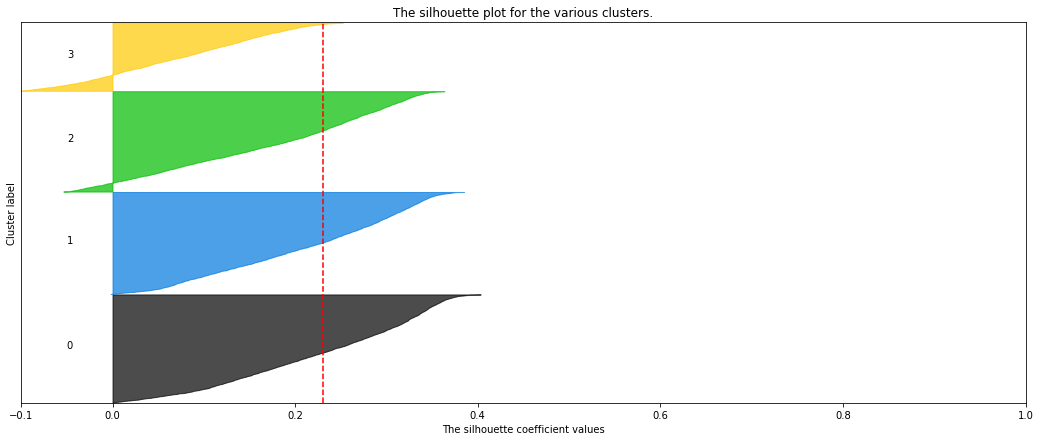

For n_clusters = 5 The average silhouette_score is: 0.2117
For n_clusters = 5 The average silhouette_score is : 0.21166123331268355


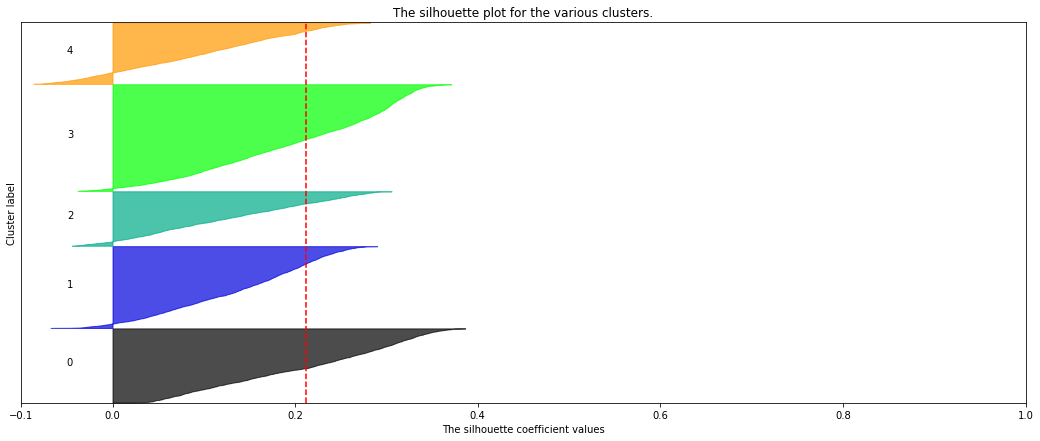

For n_clusters = 6 The average silhouette_score is: 0.2331
For n_clusters = 6 The average silhouette_score is : 0.23311093685494608


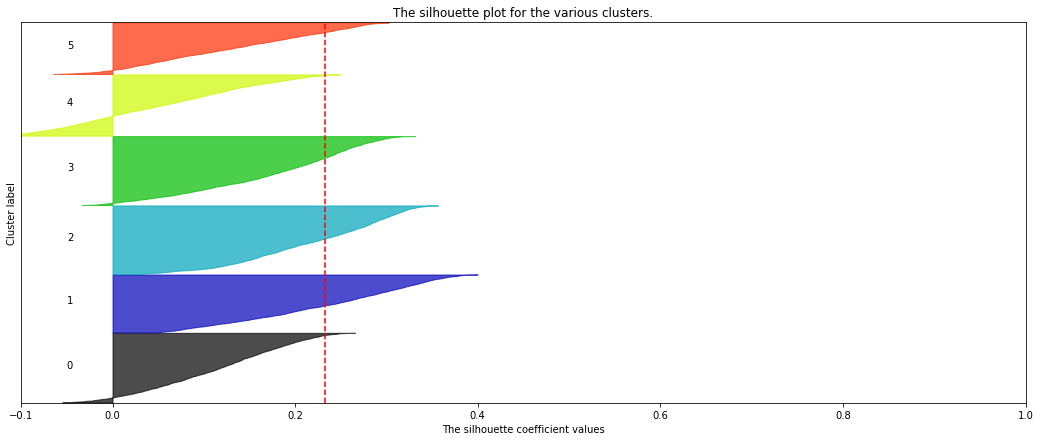

For n_clusters = 7 The average silhouette_score is: 0.227
For n_clusters = 7 The average silhouette_score is : 0.22696249428401602


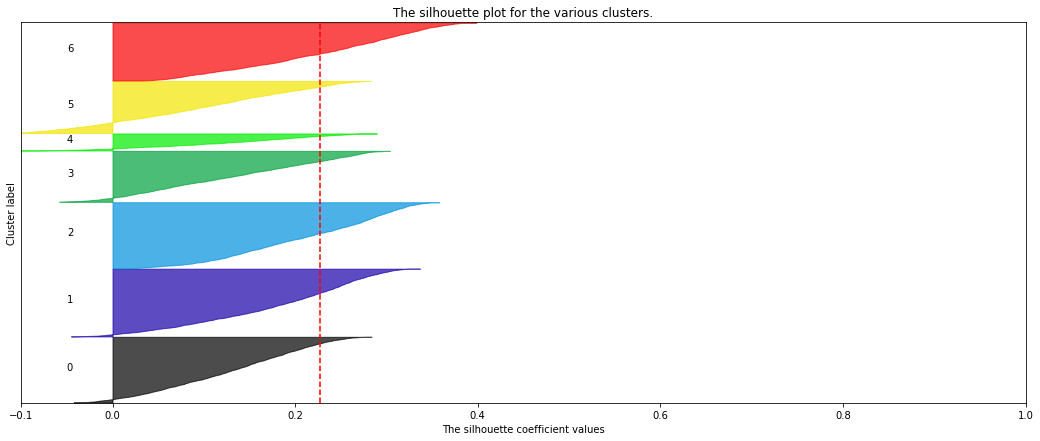

For n_clusters = 8 The average silhouette_score is: 0.2222
For n_clusters = 8 The average silhouette_score is : 0.22215956716177213


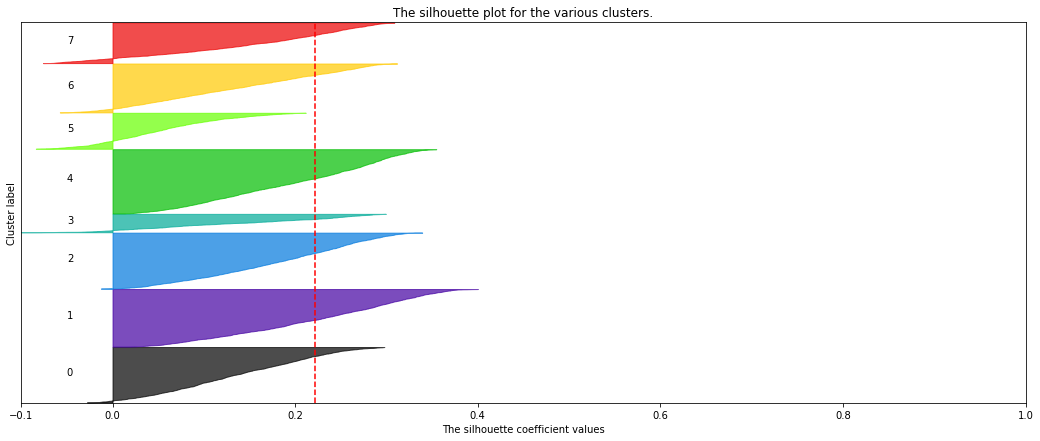

For n_clusters = 9 The average silhouette_score is: 0.2152
For n_clusters = 9 The average silhouette_score is : 0.21515035916356365


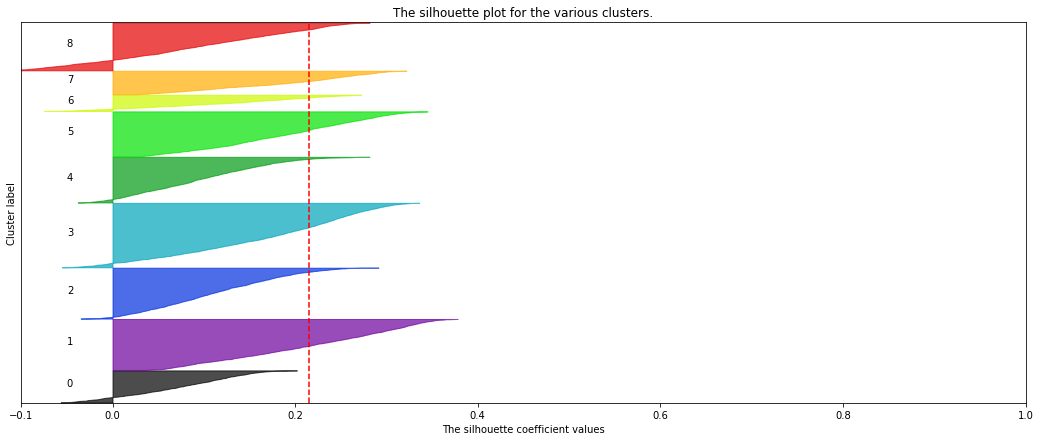

For n_clusters = 10 The average silhouette_score is: 0.2147
For n_clusters = 10 The average silhouette_score is : 0.21468575919204366


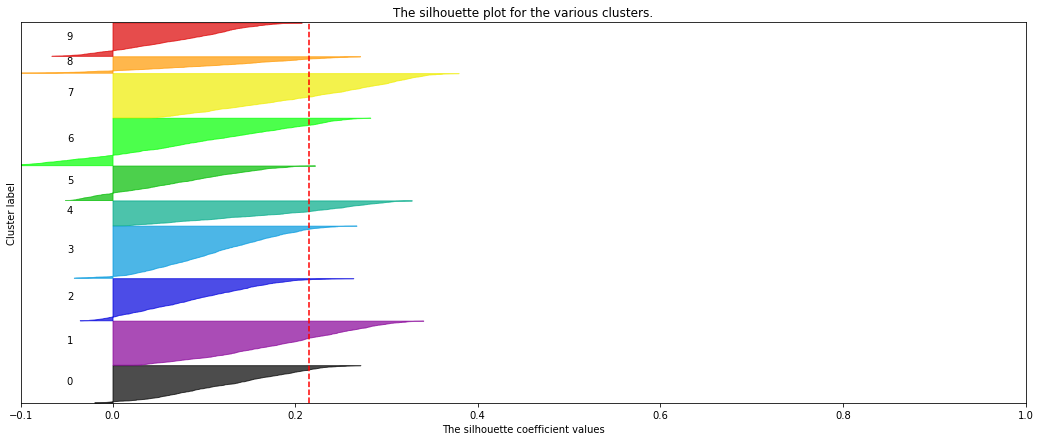

In [ ]:
silhouette(trainX,True,"euclidean","forgy")  # from scratch

#### clearly the silhoutte score is better for n_clusters=3

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.066s...
[t-SNE] Computed neighbors for 1000 samples in 1.989s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 2.665977
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.577698
[t-SNE] KL divergence after 300 iterations: 0.997174


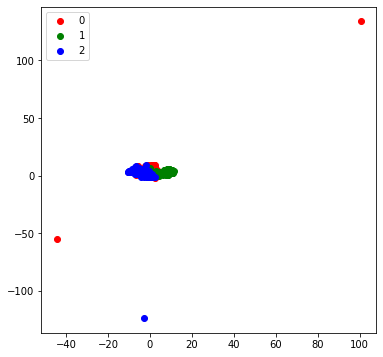

In [ ]:
visualise_tsne(testX,testy,3,True,"euclidean","forgy")

For n_clusters = 2 The average silhouette_score is: 0.2292
For n_clusters = 2 The average silhouette_score is : 0.22920120948901485


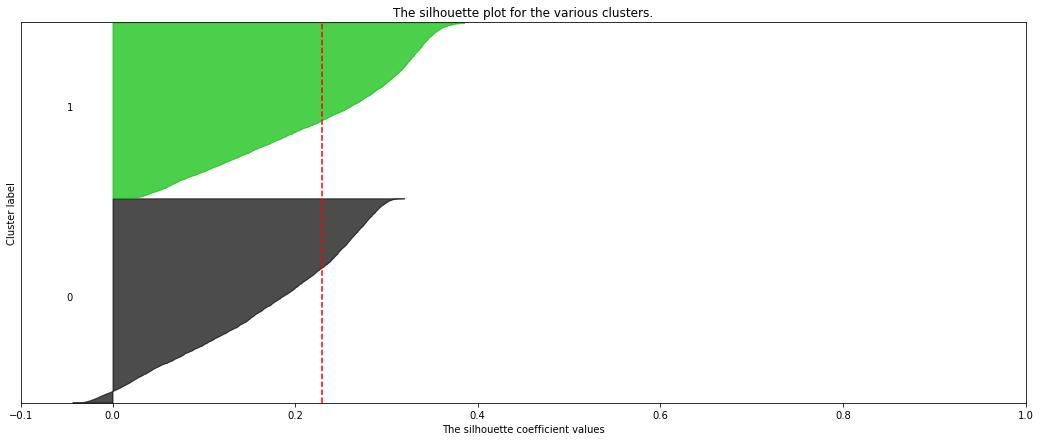

For n_clusters = 3 The average silhouette_score is: 0.2446
For n_clusters = 3 The average silhouette_score is : 0.24456600533078912


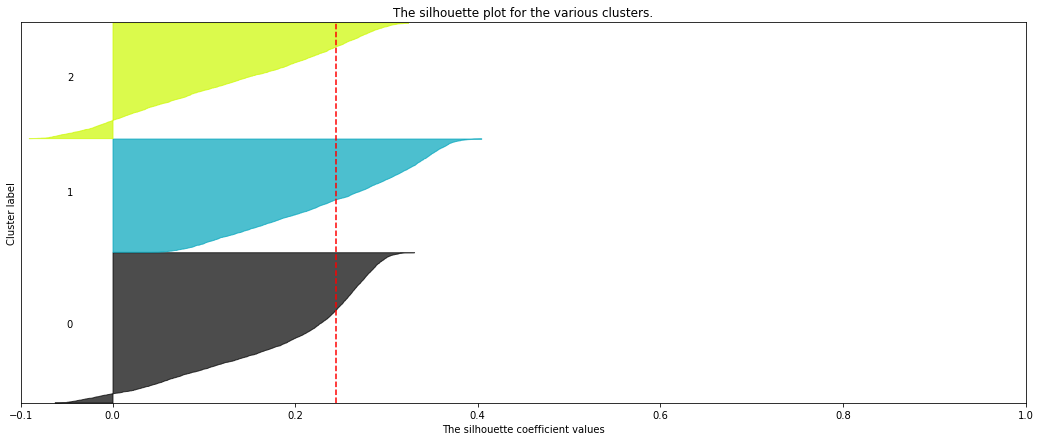

For n_clusters = 4 The average silhouette_score is: 0.2304
For n_clusters = 4 The average silhouette_score is : 0.230406924350794


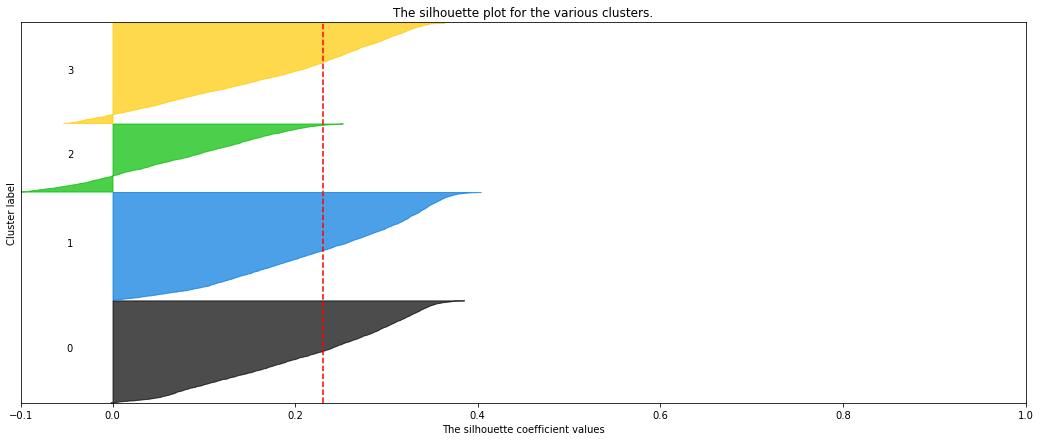

For n_clusters = 5 The average silhouette_score is: 0.2177
For n_clusters = 5 The average silhouette_score is : 0.21768220514078532


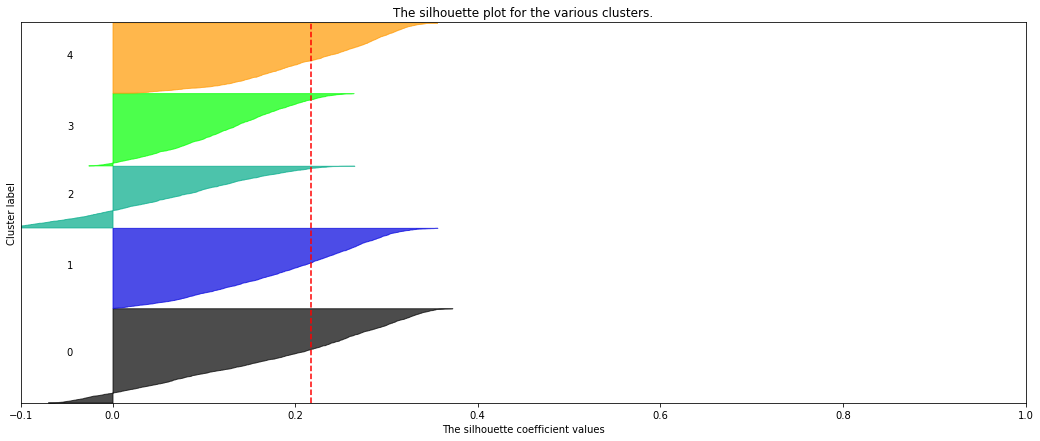

For n_clusters = 6 The average silhouette_score is: 0.2117
For n_clusters = 6 The average silhouette_score is : 0.2117492923406826


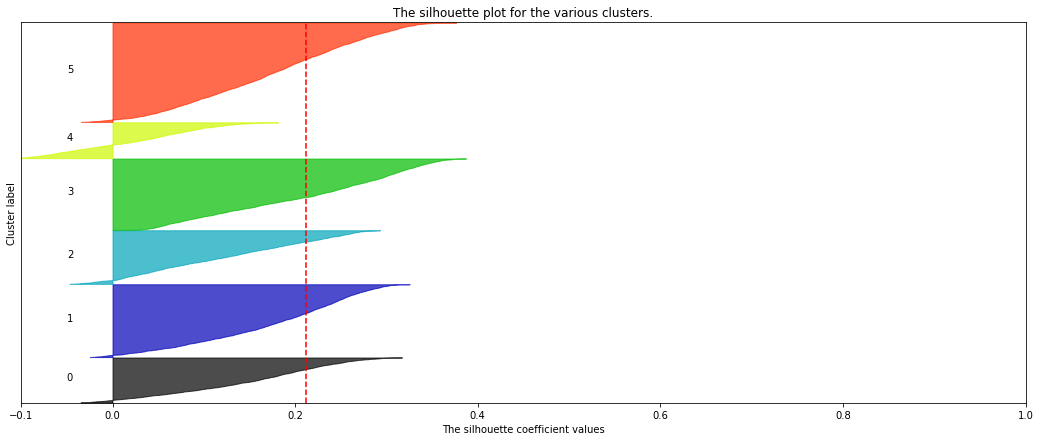

For n_clusters = 7 The average silhouette_score is: 0.2296
For n_clusters = 7 The average silhouette_score is : 0.22960253749530915


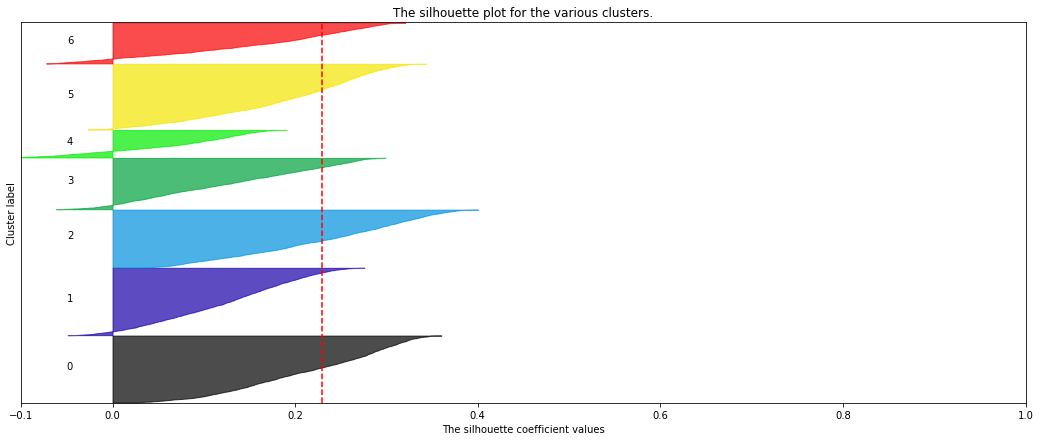

For n_clusters = 8 The average silhouette_score is: 0.2179
For n_clusters = 8 The average silhouette_score is : 0.21785531568087435


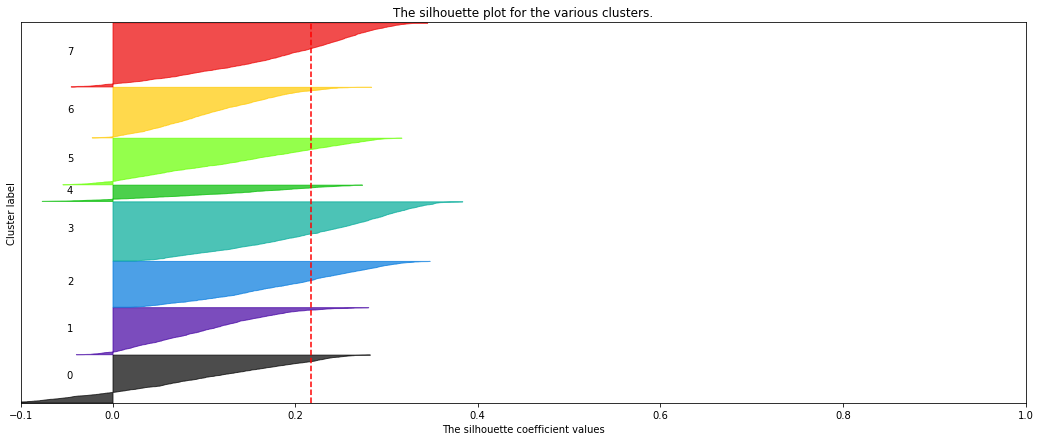

For n_clusters = 9 The average silhouette_score is: 0.2472
For n_clusters = 9 The average silhouette_score is : 0.24724175649814917


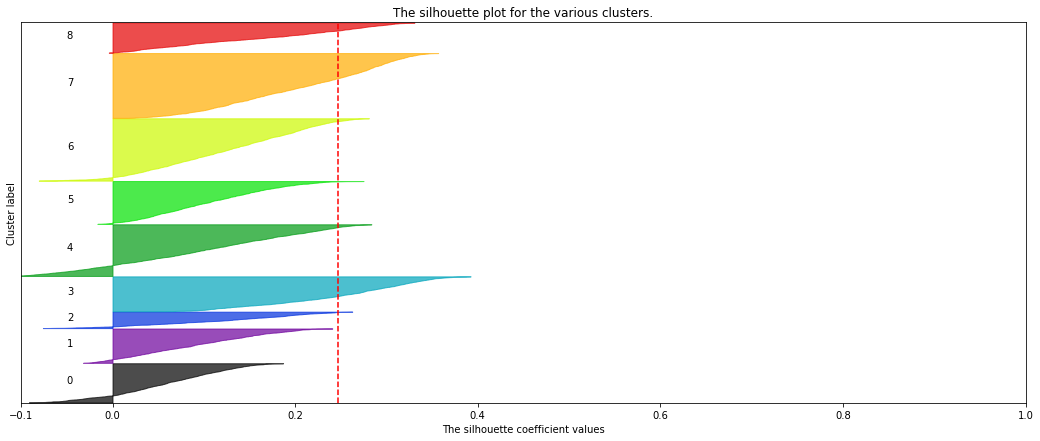

For n_clusters = 10 The average silhouette_score is: 0.2225
For n_clusters = 10 The average silhouette_score is : 0.22245995058905021


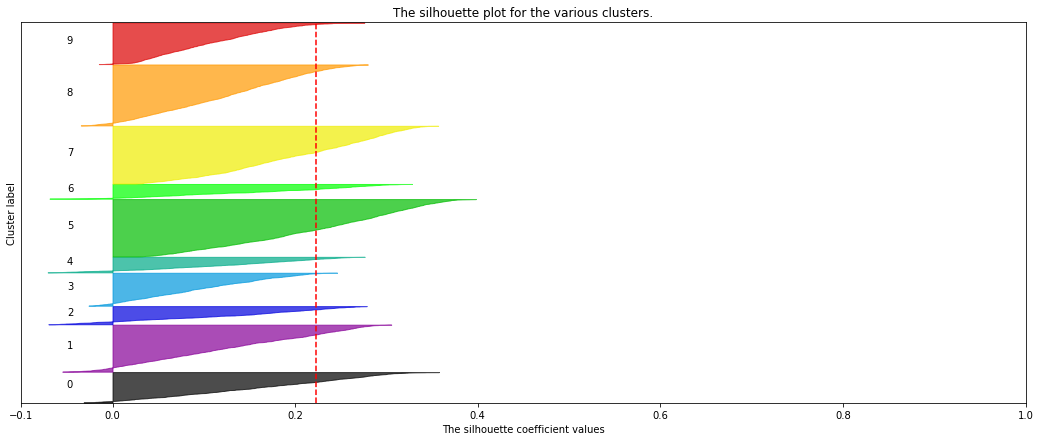

In [ ]:
silhouette(trainX,True,"euclidean","random_partition")  # from scratch

#### clearly the silhoutte score is better for n_clusters=9

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.062s...
[t-SNE] Computed neighbors for 1000 samples in 2.020s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 2.665977
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.683090
[t-SNE] KL divergence after 300 iterations: 0.966806
Inertia(With in the cluster sum of squares) is 47546.72461903095 


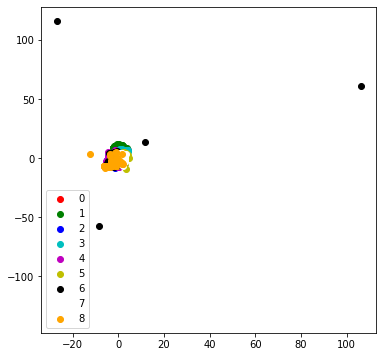

In [ ]:
visualise_tsne(testX,testy,9,True,"euclidean","random")

### Experimenting with elbow method on kmeans `Custom` Algorithm

Homogeneity score for k= 2 is 0.3987239585366057 
 k= 2 over ->Homogeneity score for k= 3 is 0.526875226544501 
 k= 3 over ->Homogeneity score for k= 4 is 0.5311482581459785 
 k= 4 over ->Homogeneity score for k= 5 is 0.5432453269284734 
 k= 5 over ->Homogeneity score for k= 6 is 0.5645455534379628 
 k= 6 over ->Homogeneity score for k= 7 is 0.5375442624662546 
 k= 7 over ->Homogeneity score for k= 8 is 0.5770390575606908 
 k= 8 over ->Homogeneity score for k= 9 is 0.5499792709212897 
 k= 9 over ->Homogeneity score for k= 10 is 0.5432783261624091 
 k= 10 over ->

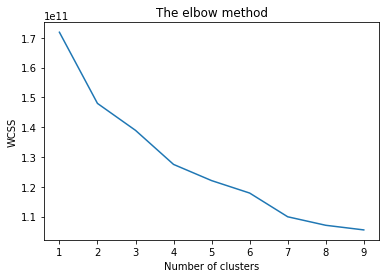

In [ ]:
elbow(trainX,trainy,True,"manhatten","forgy")

#### optimal clusters=7

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 21000 samples in 4.331s...
[t-SNE] Computed neighbors for 21000 samples in 858.232s...
[t-SNE] Computed conditional probabilities for sample 1000 / 21000
[t-SNE] Computed conditional probabilities for sample 2000 / 21000
[t-SNE] Computed conditional probabilities for sample 3000 / 21000
[t-SNE] Computed conditional probabilities for sample 4000 / 21000
[t-SNE] Computed conditional probabilities for sample 5000 / 21000
[t-SNE] Computed conditional probabilities for sample 6000 / 21000
[t-SNE] Computed conditional probabilities for sample 7000 / 21000
[t-SNE] Computed conditional probabilities for sample 8000 / 21000
[t-SNE] Computed conditional probabilities for sample 9000 / 21000
[t-SNE] Computed conditional probabilities for sample 10000 / 21000
[t-SNE] Computed conditional probabilities for sample 11000 / 21000
[t-SNE] Computed conditional probabilities for sample 12000 / 21000
[t-SNE] Computed conditional probabilities for 

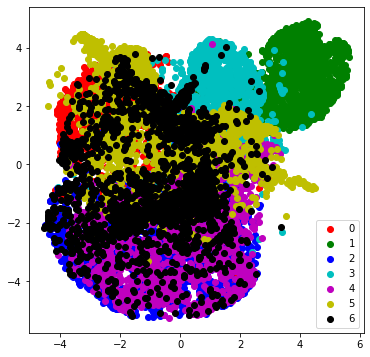

In [ ]:
visualise_tsne(testX,testy,7,True,"manhatten","forgy")

Homogeneity score for k= 2 is 0.40707259712567356 
 k= 2 over ->Homogeneity score for k= 3 is 0.5192523237975221 
 k= 3 over ->Homogeneity score for k= 4 is 0.5345974717289856 
 k= 4 over ->Homogeneity score for k= 5 is 0.5370804054424516 
 k= 5 over ->Homogeneity score for k= 6 is 0.5448549563815016 
 k= 6 over ->Homogeneity score for k= 7 is 0.5026480715233916 
 k= 7 over ->Homogeneity score for k= 8 is 0.5483917709652094 
 k= 8 over ->Homogeneity score for k= 9 is 0.538186970395958 
 k= 9 over ->Homogeneity score for k= 10 is 0.5386578429975296 
 k= 10 over ->

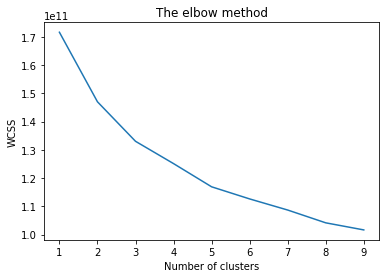

In [ ]:
elbow(trainX,trainy,True,"euclidean","forgy")

#### optimal number of clusters=5

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 21000 samples in 4.304s...
[t-SNE] Computed neighbors for 21000 samples in 857.372s...
[t-SNE] Computed conditional probabilities for sample 1000 / 21000
[t-SNE] Computed conditional probabilities for sample 2000 / 21000
[t-SNE] Computed conditional probabilities for sample 3000 / 21000
[t-SNE] Computed conditional probabilities for sample 4000 / 21000
[t-SNE] Computed conditional probabilities for sample 5000 / 21000
[t-SNE] Computed conditional probabilities for sample 6000 / 21000
[t-SNE] Computed conditional probabilities for sample 7000 / 21000
[t-SNE] Computed conditional probabilities for sample 8000 / 21000
[t-SNE] Computed conditional probabilities for sample 9000 / 21000
[t-SNE] Computed conditional probabilities for sample 10000 / 21000
[t-SNE] Computed conditional probabilities for sample 11000 / 21000
[t-SNE] Computed conditional probabilities for sample 12000 / 21000
[t-SNE] Computed conditional probabilities for 

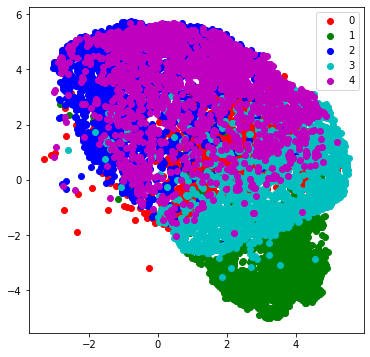

In [ ]:
visualise_tsne(testX,testy,5,True,"euclidean","forgy")

Homogeneity score for k= 2 is 0.4063687528864993 
 k= 2 over ->Homogeneity score for k= 3 is 0.5192523237975221 
 k= 3 over ->Homogeneity score for k= 4 is 0.5345498878727882 
 k= 4 over ->Homogeneity score for k= 5 is 0.5198168003082762 
 k= 5 over ->Homogeneity score for k= 6 is 0.5449346946932747 
 k= 6 over ->Homogeneity score for k= 7 is 0.57885475173369 
 k= 7 over ->Homogeneity score for k= 8 is 0.5176228132529089 
 k= 8 over ->Homogeneity score for k= 9 is 0.5504801371011688 
 k= 9 over ->Homogeneity score for k= 10 is 0.5341337000625042 
 k= 10 over ->

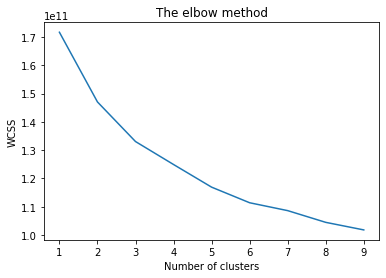

In [ ]:
elbow(trainX,trainy,True,"euclidean","random_partition")

#### optimal number of clusters=6

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 21000 samples in 4.276s...
[t-SNE] Computed neighbors for 21000 samples in 856.629s...
[t-SNE] Computed conditional probabilities for sample 1000 / 21000
[t-SNE] Computed conditional probabilities for sample 2000 / 21000
[t-SNE] Computed conditional probabilities for sample 3000 / 21000
[t-SNE] Computed conditional probabilities for sample 4000 / 21000
[t-SNE] Computed conditional probabilities for sample 5000 / 21000
[t-SNE] Computed conditional probabilities for sample 6000 / 21000
[t-SNE] Computed conditional probabilities for sample 7000 / 21000
[t-SNE] Computed conditional probabilities for sample 8000 / 21000
[t-SNE] Computed conditional probabilities for sample 9000 / 21000
[t-SNE] Computed conditional probabilities for sample 10000 / 21000
[t-SNE] Computed conditional probabilities for sample 11000 / 21000
[t-SNE] Computed conditional probabilities for sample 12000 / 21000
[t-SNE] Computed conditional probabilities for 

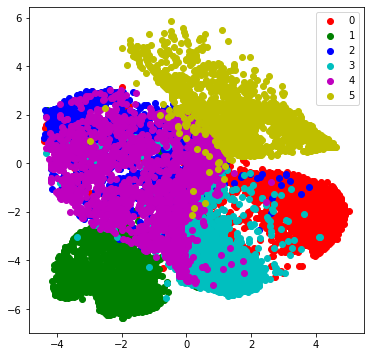

In [ ]:
visualise_tsne(testX,testy,6,True,"euclidean","random")

### Experimenting with silhouttte methods `SCikit` learn algorithm

For n_clusters = 2 The average silhouette_score is : 0.19274221


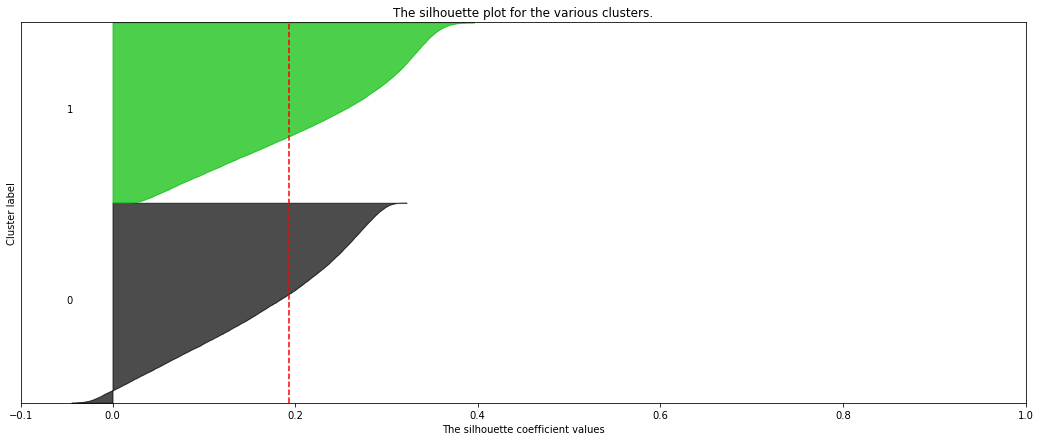

For n_clusters = 3 The average silhouette_score is : 0.18460605


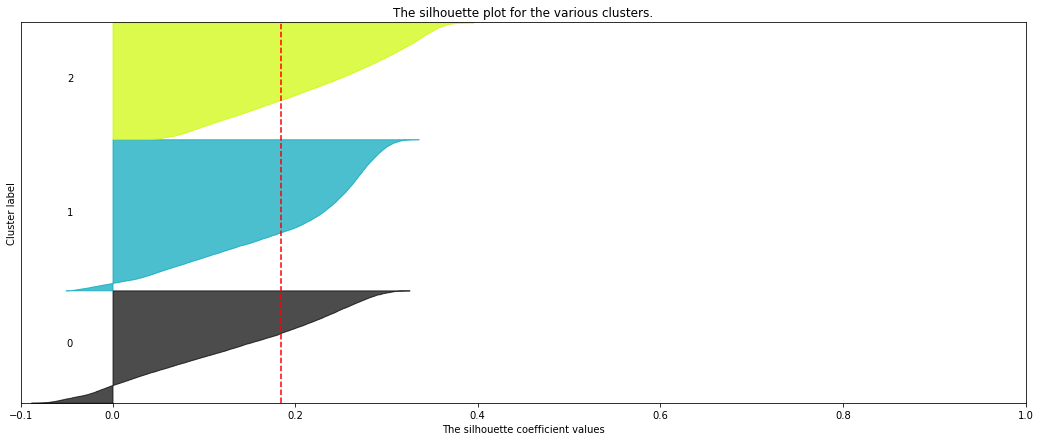

For n_clusters = 4 The average silhouette_score is : 0.17976311


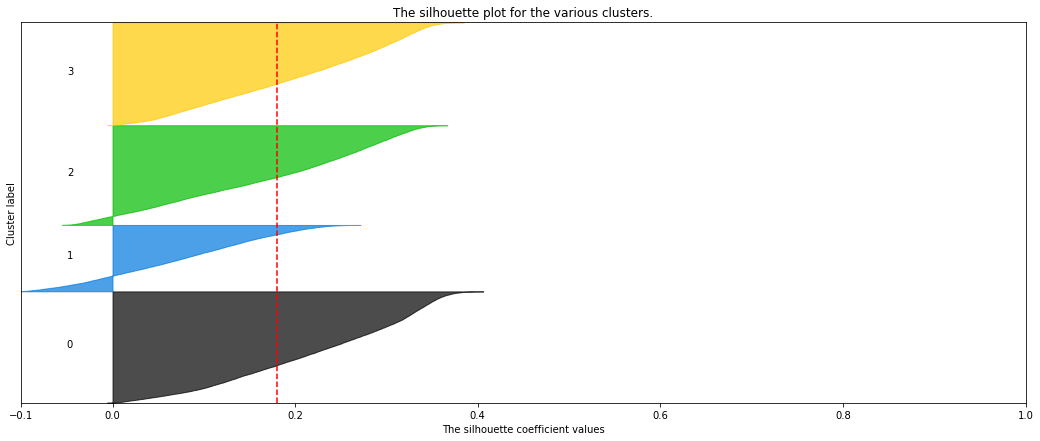

For n_clusters = 5 The average silhouette_score is : 0.1612732


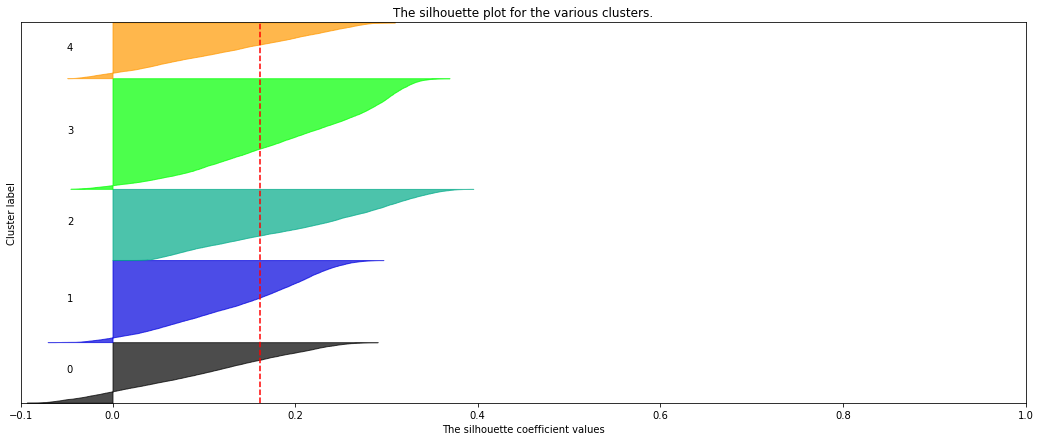

For n_clusters = 6 The average silhouette_score is : 0.15630217


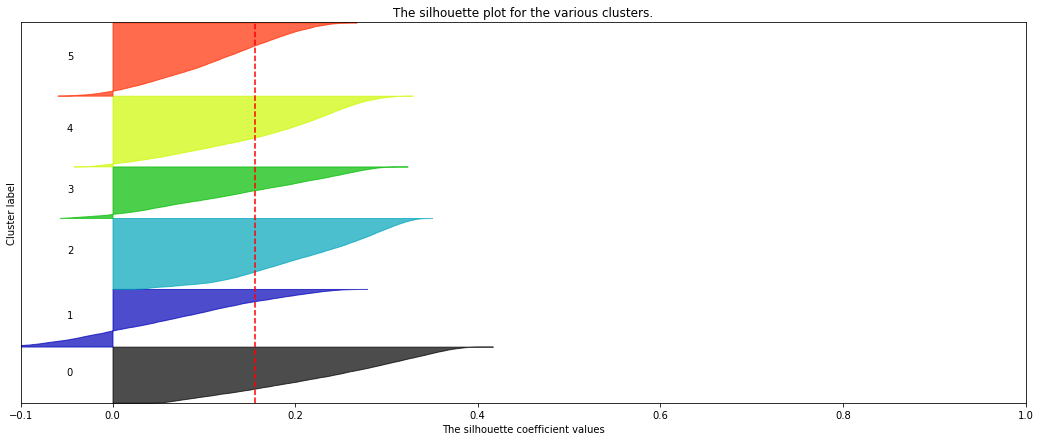

For n_clusters = 7 The average silhouette_score is : 0.16563977


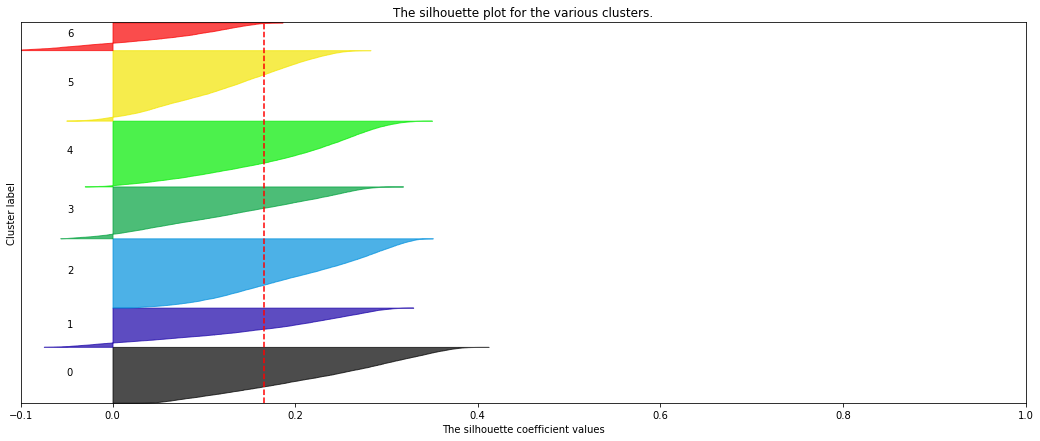

For n_clusters = 8 The average silhouette_score is : 0.15477169


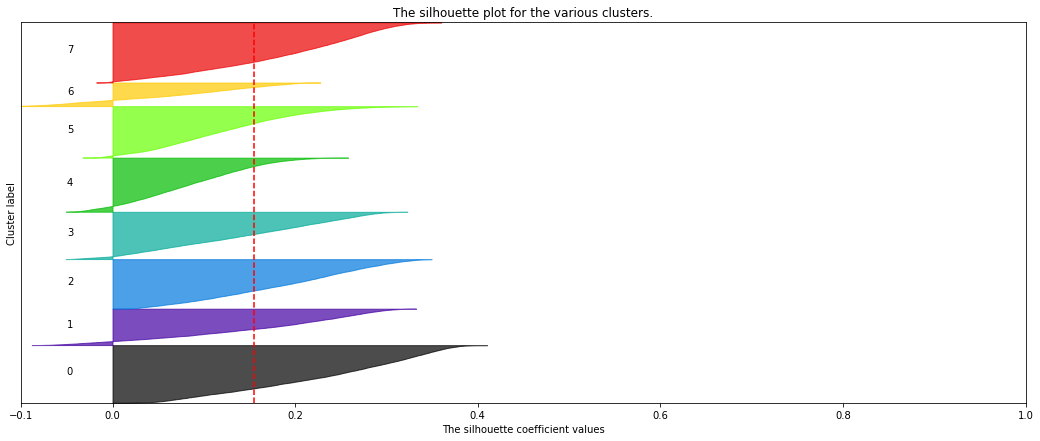

For n_clusters = 9 The average silhouette_score is : 0.15696728


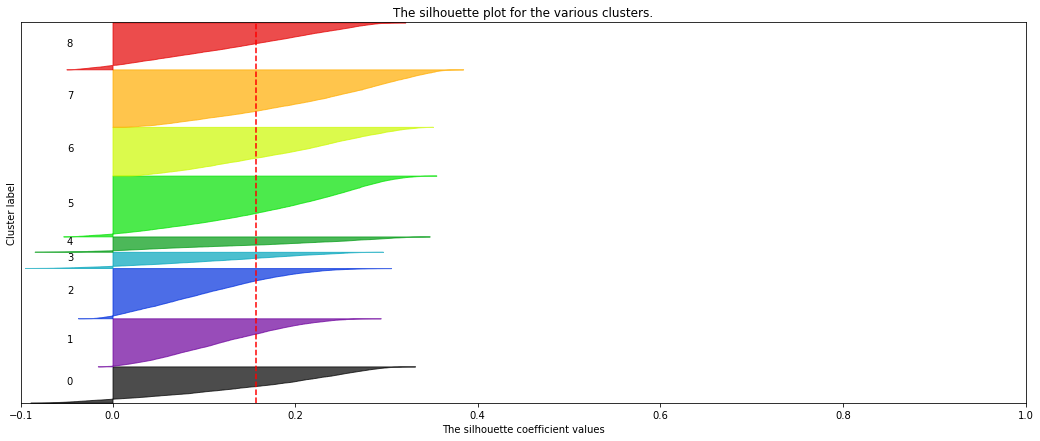

For n_clusters = 10 The average silhouette_score is : 0.1546116


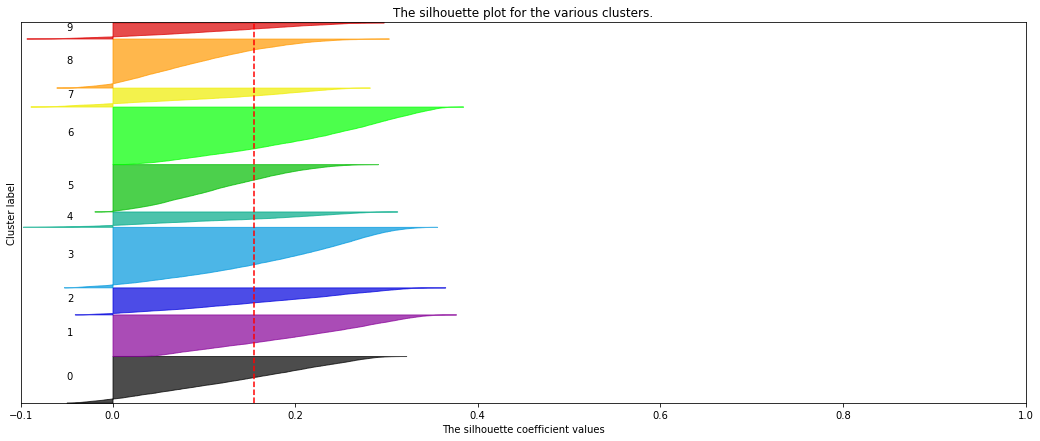

In [ ]:
silhouette(trainX,False,"manhatten","random_partition")

#### optimal number of clusters= 2

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 21000 samples in 4.287s...
[t-SNE] Computed neighbors for 21000 samples in 855.859s...
[t-SNE] Computed conditional probabilities for sample 1000 / 21000
[t-SNE] Computed conditional probabilities for sample 2000 / 21000
[t-SNE] Computed conditional probabilities for sample 3000 / 21000
[t-SNE] Computed conditional probabilities for sample 4000 / 21000
[t-SNE] Computed conditional probabilities for sample 5000 / 21000
[t-SNE] Computed conditional probabilities for sample 6000 / 21000
[t-SNE] Computed conditional probabilities for sample 7000 / 21000
[t-SNE] Computed conditional probabilities for sample 8000 / 21000
[t-SNE] Computed conditional probabilities for sample 9000 / 21000
[t-SNE] Computed conditional probabilities for sample 10000 / 21000
[t-SNE] Computed conditional probabilities for sample 11000 / 21000
[t-SNE] Computed conditional probabilities for sample 12000 / 21000
[t-SNE] Computed conditional probabilities for 

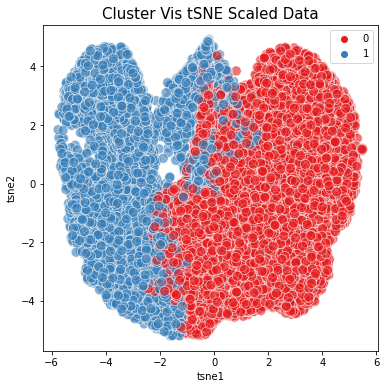

In [ ]:
visualise_tsne(testX,testy,2,False,"manhatten","random")

### Experimenting with elbow on `Scikit` learn algorithm 

Homogeneity score for k= 2 is 0.40761195856321614 
 k= 2 over ->Homogeneity score for k= 3 is 0.519252323797522 
 k= 3 over ->Homogeneity score for k= 4 is 0.5345498878727882 
 k= 4 over ->Homogeneity score for k= 5 is 0.5198406911166975 
 k= 5 over ->Homogeneity score for k= 6 is 0.5449218275845847 
 k= 6 over ->Homogeneity score for k= 7 is 0.5788831094500019 
 k= 7 over ->Homogeneity score for k= 8 is 0.5320323142816898 
 k= 8 over ->Homogeneity score for k= 9 is 0.538045866367116 
 k= 9 over ->Homogeneity score for k= 10 is 0.5238275826522676 
 k= 10 over ->

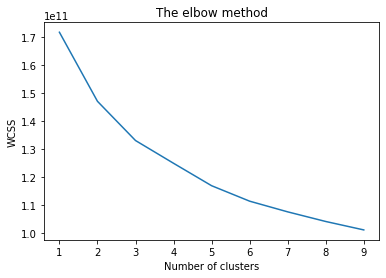

In [ ]:
elbow(trainX,trainy,False,"euclidean","forgy")

#### optimal number of clusters = 5

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 21000 samples in 2.799s...
[t-SNE] Computed neighbors for 21000 samples in 824.339s...
[t-SNE] Computed conditional probabilities for sample 1000 / 21000
[t-SNE] Computed conditional probabilities for sample 2000 / 21000
[t-SNE] Computed conditional probabilities for sample 3000 / 21000
[t-SNE] Computed conditional probabilities for sample 4000 / 21000
[t-SNE] Computed conditional probabilities for sample 5000 / 21000
[t-SNE] Computed conditional probabilities for sample 6000 / 21000
[t-SNE] Computed conditional probabilities for sample 7000 / 21000
[t-SNE] Computed conditional probabilities for sample 8000 / 21000
[t-SNE] Computed conditional probabilities for sample 9000 / 21000
[t-SNE] Computed conditional probabilities for sample 10000 / 21000
[t-SNE] Computed conditional probabilities for sample 11000 / 21000
[t-SNE] Computed conditional probabilities for sample 12000 / 21000
[t-SNE] Computed conditional probabilities for 

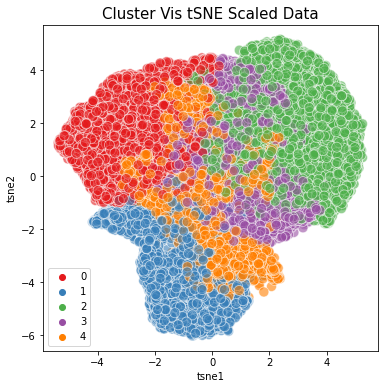

In [ ]:
visualise_tsne(testX,testy,5,False,"euclidean","random")

## Observations:



1.   Elbow method on the custom algorithm and the scikit learn algorithms are almost similar. The homegenity scores are also almost similar. So overall the custom algorthm is performing similar to that of scikit learn
2.   In many of the cases in elbow method the optimal clusters remained at 7 or 6/5.
3. Initialisation with forgy is producing slightly better homogeneous scores compared to the random partition method.
4. Inertia calculated from scratch matches with the inertia of the kmeans scikit learn algorithm.
5. sihoutte method is slower compared to elbow method since it takes more time to calculate the inter cluster similarity and the intra cluster similarity.
6. sihoutte method on custom algorithm takes more time compared to the scikit learn algorithm.
7.  In sihoutte method many a time optimal clusters lies at 2,4,7.





## Experiments on K-means++ Algorithms 

### Silhoutte method algorithm k-means++ `custom` 

For n_clusters = 2 The average silhouette_score is: 0.2292
For n_clusters = 2 The average silhouette_score is : 0.22920120948901485


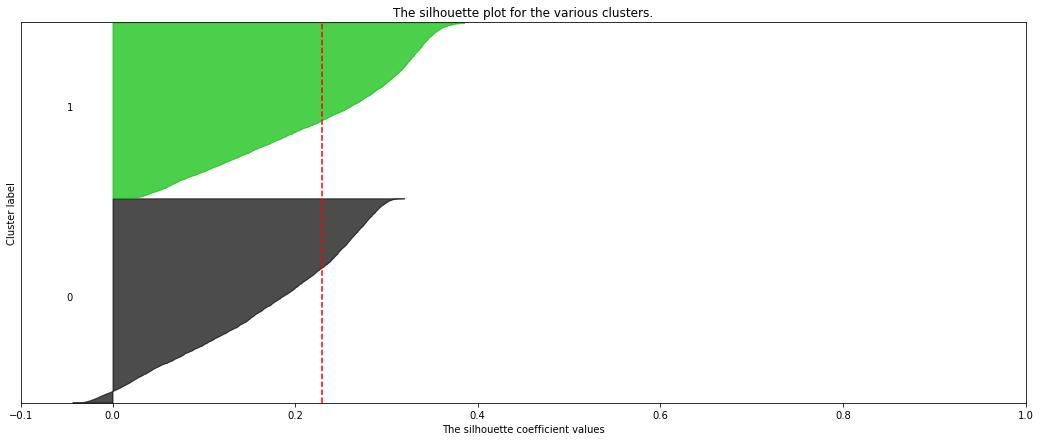

For n_clusters = 3 The average silhouette_score is: 0.2441
For n_clusters = 3 The average silhouette_score is : 0.2440820707247798


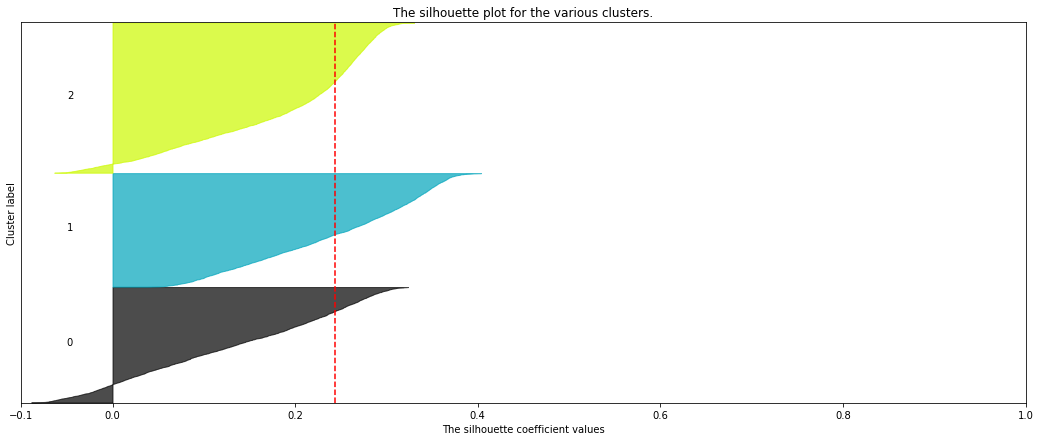

For n_clusters = 4 The average silhouette_score is: 0.1779
For n_clusters = 4 The average silhouette_score is : 0.1778939468886008


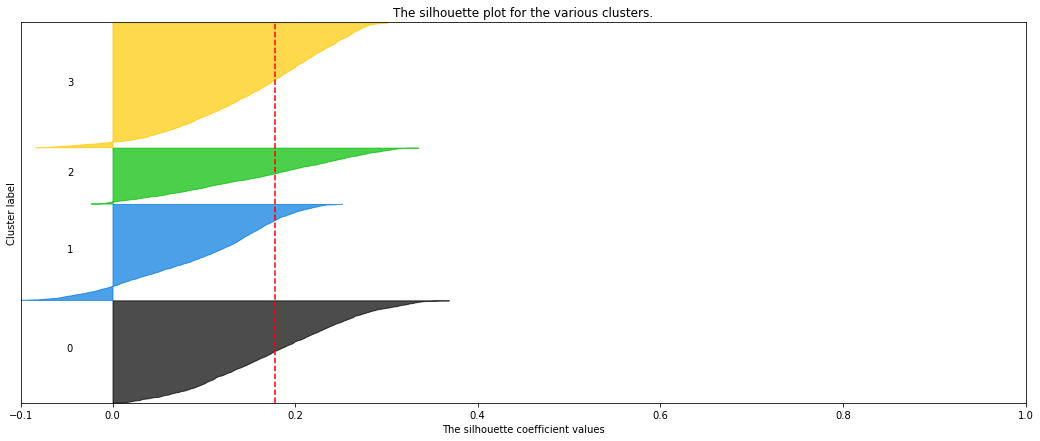

For n_clusters = 5 The average silhouette_score is: 0.2109
For n_clusters = 5 The average silhouette_score is : 0.21085483647893466


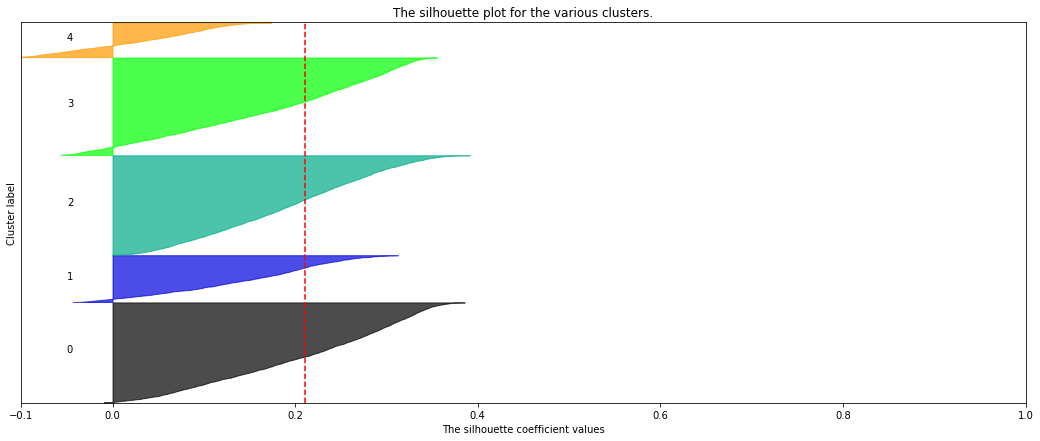

For n_clusters = 6 The average silhouette_score is: 0.2143
For n_clusters = 6 The average silhouette_score is : 0.214332322263055


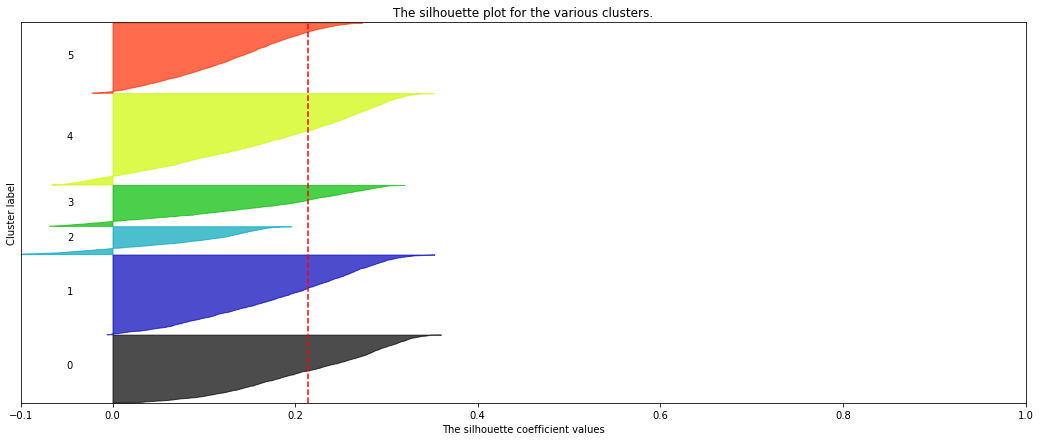

For n_clusters = 7 The average silhouette_score is: 0.2121
For n_clusters = 7 The average silhouette_score is : 0.21212835776567188


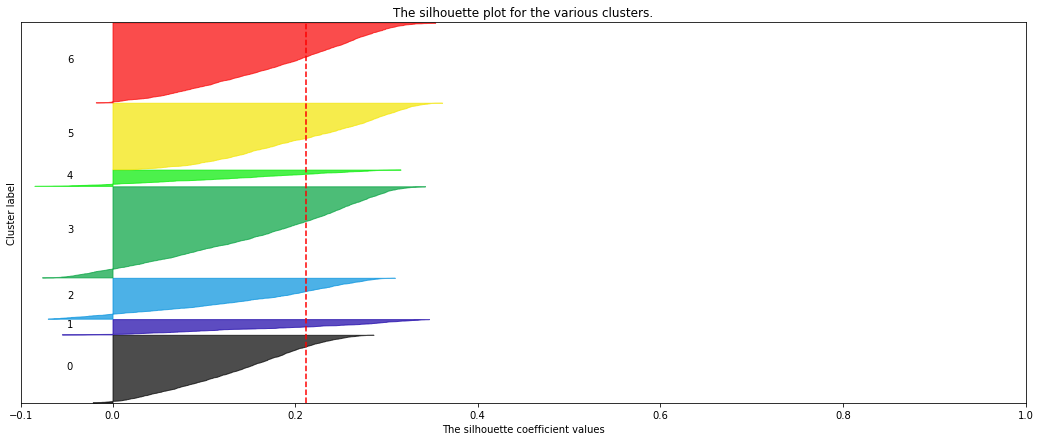

For n_clusters = 8 The average silhouette_score is: 0.2256
For n_clusters = 8 The average silhouette_score is : 0.22563667779288188


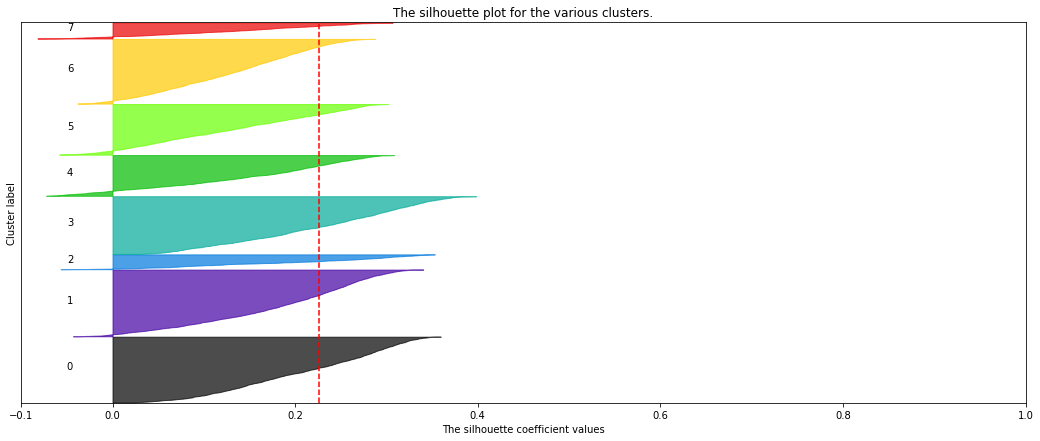

For n_clusters = 9 The average silhouette_score is: 0.2221
For n_clusters = 9 The average silhouette_score is : 0.2220849689710206


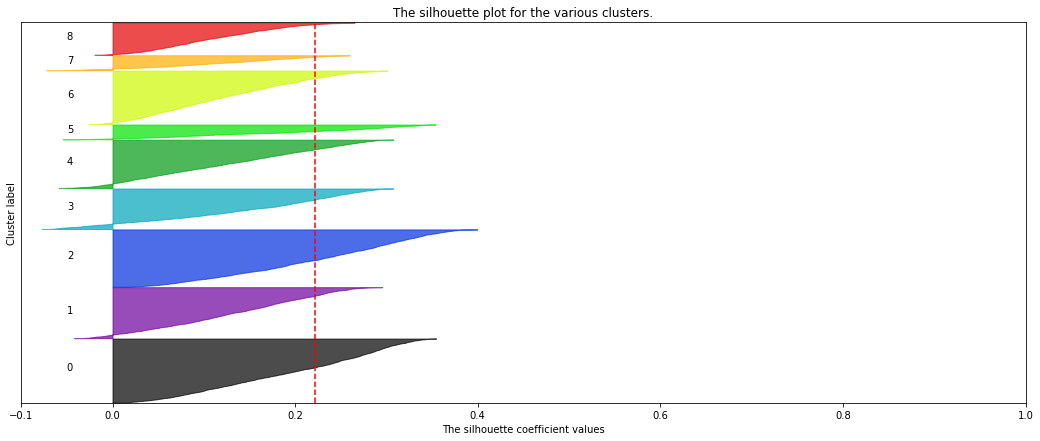

For n_clusters = 10 The average silhouette_score is: 0.2115
For n_clusters = 10 The average silhouette_score is : 0.21153660417866674


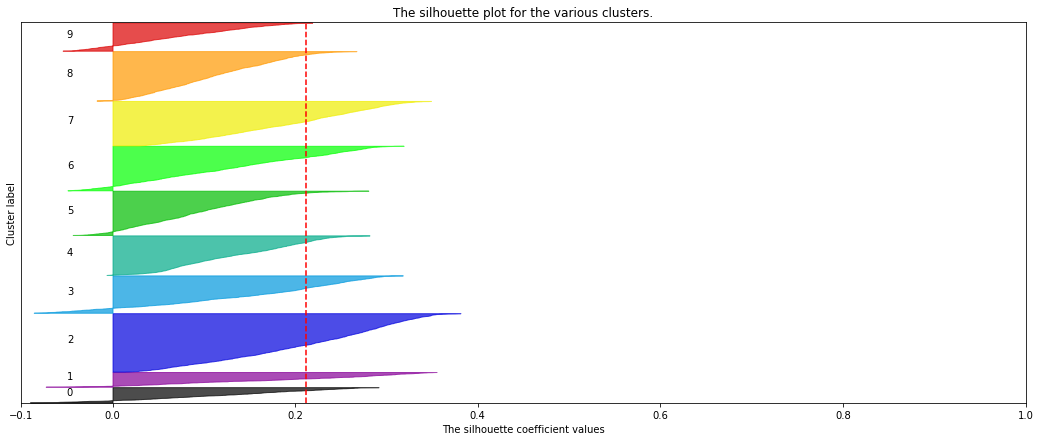

In [ ]:
silhouette(trainX,True,"euclidean","k-means++")  # from scratch

#### clearly the silhoutte score is better for n_clusters=3

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.073s...
[t-SNE] Computed neighbors for 1000 samples in 2.084s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 2.665977
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.712257
[t-SNE] KL divergence after 300 iterations: 0.920755
Inertia(With in the cluster sum of squares) is 77132.02439498901 


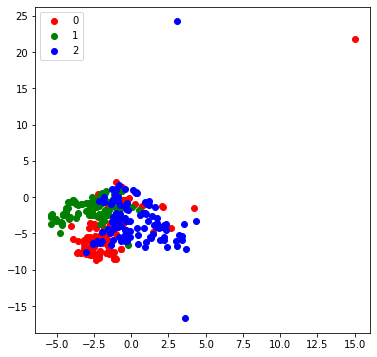

In [ ]:
visualise_tsne(testX,testy,3,True,"euclidean","k-means++")

For n_clusters = 2 The average silhouette_score is: 0.2953
For n_clusters = 2 The average silhouette_score is : 0.29528663388030607


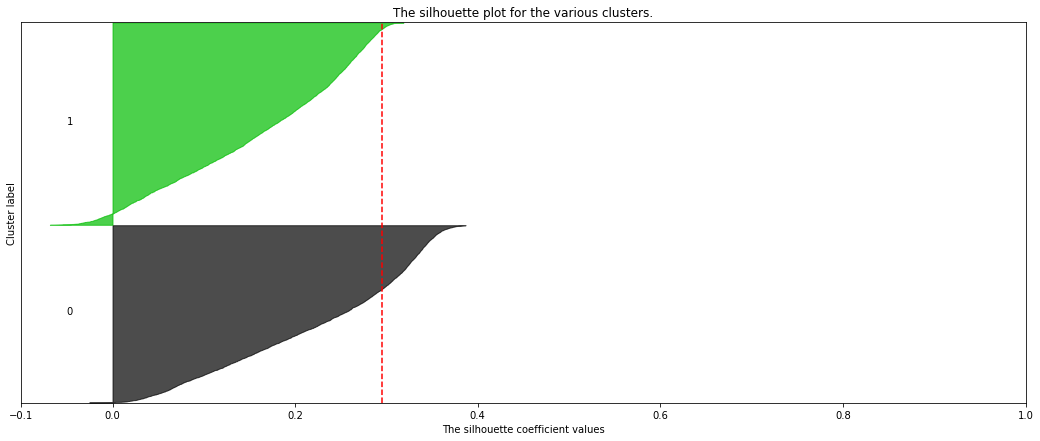

For n_clusters = 3 The average silhouette_score is: 0.2793
For n_clusters = 3 The average silhouette_score is : 0.2792870442810625


For n_clusters = 4 The average silhouette_score is: 0.2526
For n_clusters = 4 The average silhouette_score is : 0.25259788391212523


For n_clusters = 5 The average silhouette_score is: 0.2678
For n_clusters = 5 The average silhouette_score is : 0.26777647561975165


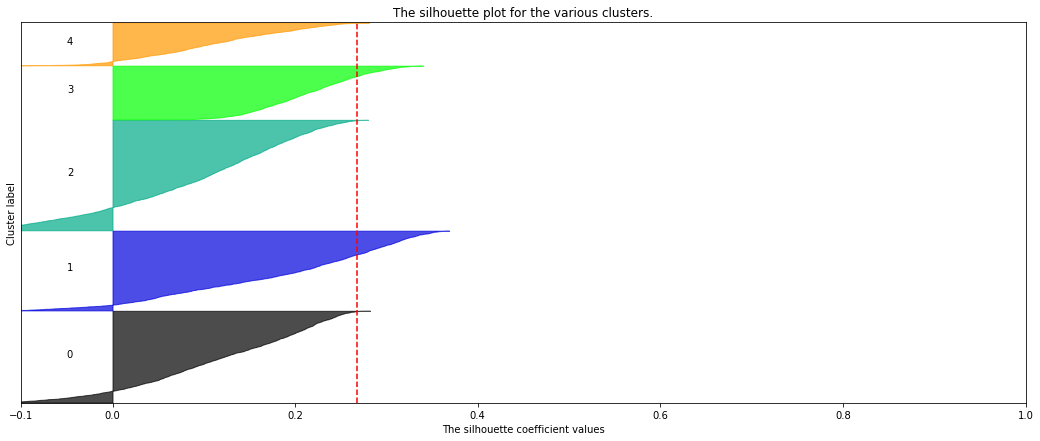

For n_clusters = 6 The average silhouette_score is: 0.2692
For n_clusters = 6 The average silhouette_score is : 0.26919694394494503


For n_clusters = 7 The average silhouette_score is: 0.303
For n_clusters = 7 The average silhouette_score is : 0.30302823608195467


For n_clusters = 8 The average silhouette_score is: 0.2787
For n_clusters = 8 The average silhouette_score is : 0.2786953020604291


For n_clusters = 9 The average silhouette_score is: 0.2718
For n_clusters = 9 The average silhouette_score is : 0.2717558464147981


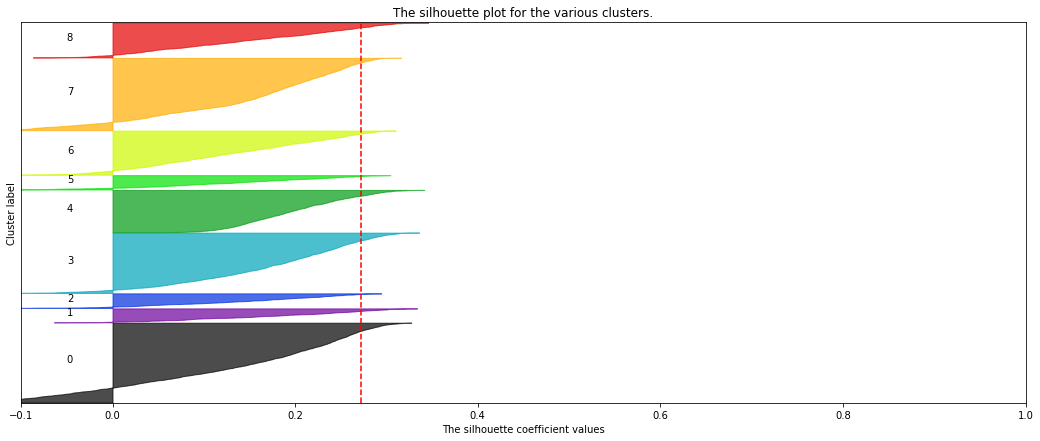

For n_clusters = 10 The average silhouette_score is: 0.2648
For n_clusters = 10 The average silhouette_score is : 0.2648031823211815


In [ ]:
silhouette(trainX,True,"manhatten","k-means++")  # from scratch

#### clearly the silhoutte score is better for n_clusters=7

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.064s...
[t-SNE] Computed neighbors for 1000 samples in 1.882s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 2.665977
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.923164
[t-SNE] KL divergence after 300 iterations: 0.931328
Inertia(With in the cluster sum of squares) is 61618.58838843554 


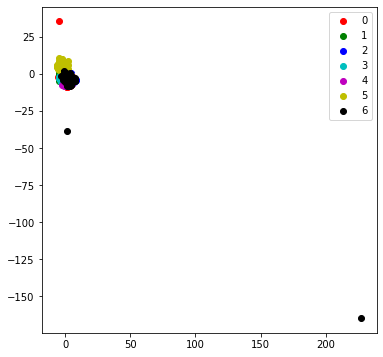

In [ ]:
visualise_tsne(testX,testy,7,True,"manhatten","k-means++")

### Elbow method on k-means++ custom

In [ ]:
elbow(trainX,trainy,True,"euclidean","k-means++")

Homogeneity score for k= 2 is 0.4063687528864993 
 k= 2 over ->Homogeneity score for k= 3 is 0.5192523237975221 
 k= 3 over ->Homogeneity score for k= 4 is 0.5345974717289856 
 k= 4 over ->Homogeneity score for k= 5 is 0.5370804054424516 
 k= 5 over ->Homogeneity score for k= 6 is 0.5702791494080507 
 k= 6 over ->Homogeneity score for k= 7 is 0.5317295745436532 
 k= 7 over ->Homogeneity score for k= 8 is 0.544271121991604 
 k= 8 over ->Homogeneity score for k= 9 is 0.5433593025517538 
 k= 9 over ->Homogeneity score for k= 10 is 0.5215524814584643 
 k= 10 over ->

#### optimal numbers of culsters at  n_clusters=

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 21000 samples in 2.788s...
[t-SNE] Computed neighbors for 21000 samples in 812.139s...
[t-SNE] Computed conditional probabilities for sample 1000 / 21000
[t-SNE] Computed conditional probabilities for sample 2000 / 21000
[t-SNE] Computed conditional probabilities for sample 3000 / 21000
[t-SNE] Computed conditional probabilities for sample 4000 / 21000
[t-SNE] Computed conditional probabilities for sample 5000 / 21000
[t-SNE] Computed conditional probabilities for sample 6000 / 21000
[t-SNE] Computed conditional probabilities for sample 7000 / 21000
[t-SNE] Computed conditional probabilities for sample 8000 / 21000
[t-SNE] Computed conditional probabilities for sample 9000 / 21000
[t-SNE] Computed conditional probabilities for sample 10000 / 21000
[t-SNE] Computed conditional probabilities for sample 11000 / 21000
[t-SNE] Computed conditional probabilities for sample 12000 / 21000
[t-SNE] Computed conditional probabilities for 

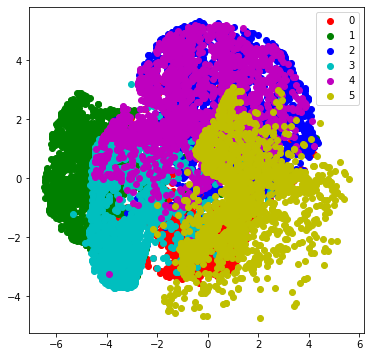

In [ ]:
visualise_tsne(testX,testy,6,True,"euclidean","k-means++")

Homogeneity score for k= 2 is 0.3987239585366057 
 k= 2 over ->Homogeneity score for k= 3 is 0.527110790229313 
 k= 3 over ->Homogeneity score for k= 4 is 0.523010122033924 
 k= 4 over ->Homogeneity score for k= 5 is 0.5563538464543293 
 k= 5 over ->Homogeneity score for k= 6 is 0.5072896422016612 
 k= 6 over ->Homogeneity score for k= 7 is 0.5864012498421719 
 k= 7 over ->Homogeneity score for k= 8 is 0.54842437046694 
 k= 8 over ->Homogeneity score for k= 9 is 0.5277535651838812 
 k= 9 over ->Homogeneity score for k= 10 is 0.5175667556263972 
 k= 10 over ->

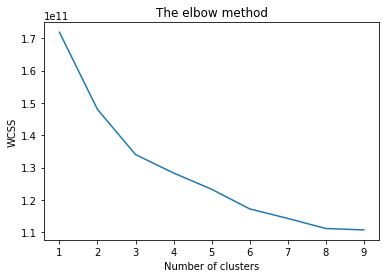

In [ ]:
elbow(trainX,trainy,True,"manhatten","k-means++")

#### optimal numbers of culsters at n_clusters=6

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 21000 samples in 2.759s...
[t-SNE] Computed neighbors for 21000 samples in 810.577s...
[t-SNE] Computed conditional probabilities for sample 1000 / 21000
[t-SNE] Computed conditional probabilities for sample 2000 / 21000
[t-SNE] Computed conditional probabilities for sample 3000 / 21000
[t-SNE] Computed conditional probabilities for sample 4000 / 21000
[t-SNE] Computed conditional probabilities for sample 5000 / 21000
[t-SNE] Computed conditional probabilities for sample 6000 / 21000
[t-SNE] Computed conditional probabilities for sample 7000 / 21000
[t-SNE] Computed conditional probabilities for sample 8000 / 21000
[t-SNE] Computed conditional probabilities for sample 9000 / 21000
[t-SNE] Computed conditional probabilities for sample 10000 / 21000
[t-SNE] Computed conditional probabilities for sample 11000 / 21000
[t-SNE] Computed conditional probabilities for sample 12000 / 21000
[t-SNE] Computed conditional probabilities for 

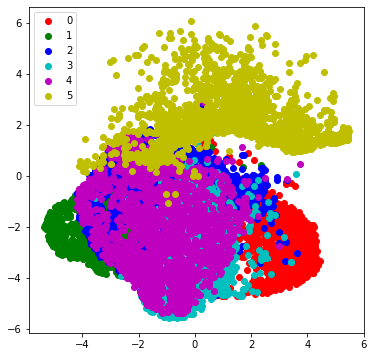

In [ ]:
visualise_tsne(testX,testy,6,True,"euclidean","k-means++")

###  Experimenting on elbow method of K-means ++  `Scikit learn`

Homogeneity score for k= 2 is 0.40755179487552234 
 k= 2 over ->Homogeneity score for k= 3 is 0.5190789472760702 
 k= 3 over ->Homogeneity score for k= 4 is 0.5345498878727882 
 k= 4 over ->Homogeneity score for k= 5 is 0.5198636465894031 
 k= 5 over ->Homogeneity score for k= 6 is 0.5449642434662906 
 k= 6 over ->Homogeneity score for k= 7 is 0.5788831094500018 
 k= 7 over ->Homogeneity score for k= 8 is 0.5322668659754944 
 k= 8 over ->Homogeneity score for k= 9 is 0.5503533780311896 
 k= 9 over ->Homogeneity score for k= 10 is 0.5224185265247604 
 k= 10 over ->

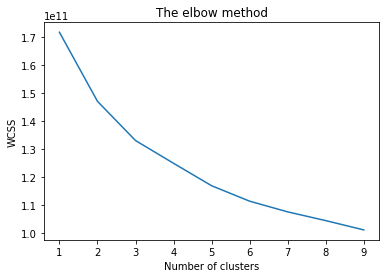

In [ ]:
elbow(trainX,trainy,False,"euclidean","k-means++")

#### clearly optimal clusters=6

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 21000 samples in 2.765s...
[t-SNE] Computed neighbors for 21000 samples in 811.454s...
[t-SNE] Computed conditional probabilities for sample 1000 / 21000
[t-SNE] Computed conditional probabilities for sample 2000 / 21000
[t-SNE] Computed conditional probabilities for sample 3000 / 21000
[t-SNE] Computed conditional probabilities for sample 4000 / 21000
[t-SNE] Computed conditional probabilities for sample 5000 / 21000
[t-SNE] Computed conditional probabilities for sample 6000 / 21000
[t-SNE] Computed conditional probabilities for sample 7000 / 21000
[t-SNE] Computed conditional probabilities for sample 8000 / 21000
[t-SNE] Computed conditional probabilities for sample 9000 / 21000
[t-SNE] Computed conditional probabilities for sample 10000 / 21000
[t-SNE] Computed conditional probabilities for sample 11000 / 21000
[t-SNE] Computed conditional probabilities for sample 12000 / 21000
[t-SNE] Computed conditional probabilities for 

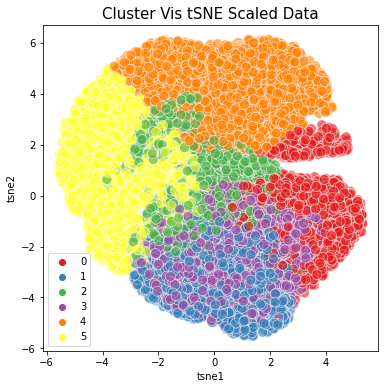

In [ ]:
visualise_tsne(testX,testy,6,False,"euclidean","k-means++")

### Experimenting with silhouttte methods `SCikit `learn algorithm kmeans++

For n_clusters = 2 The average silhouette_score is : 0.19274187


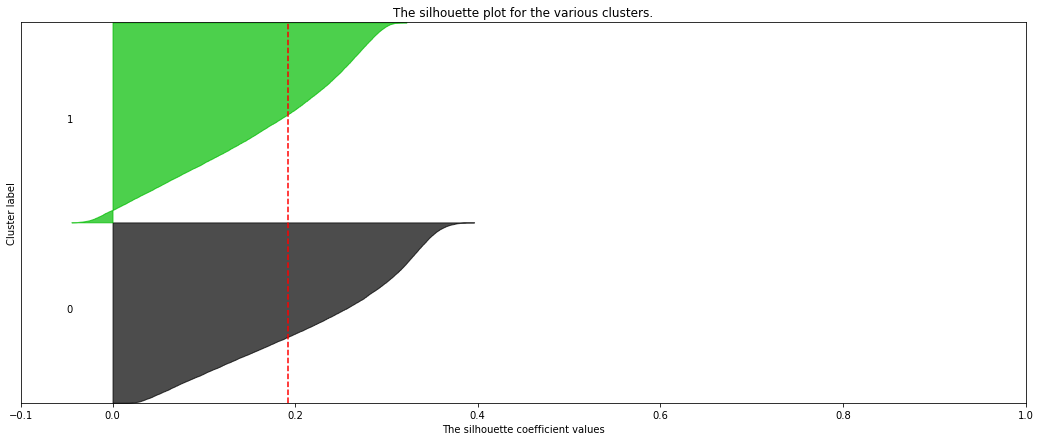

For n_clusters = 3 The average silhouette_score is : 0.185731


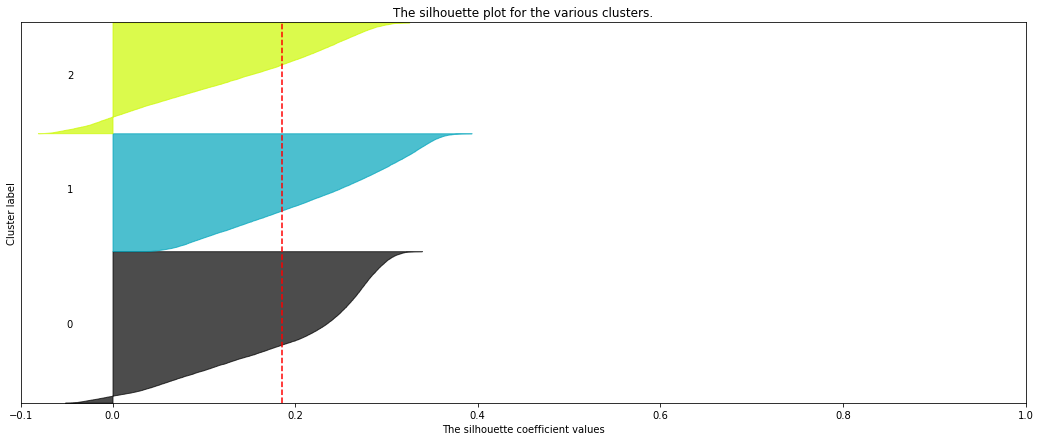

For n_clusters = 4 The average silhouette_score is : 0.17976311


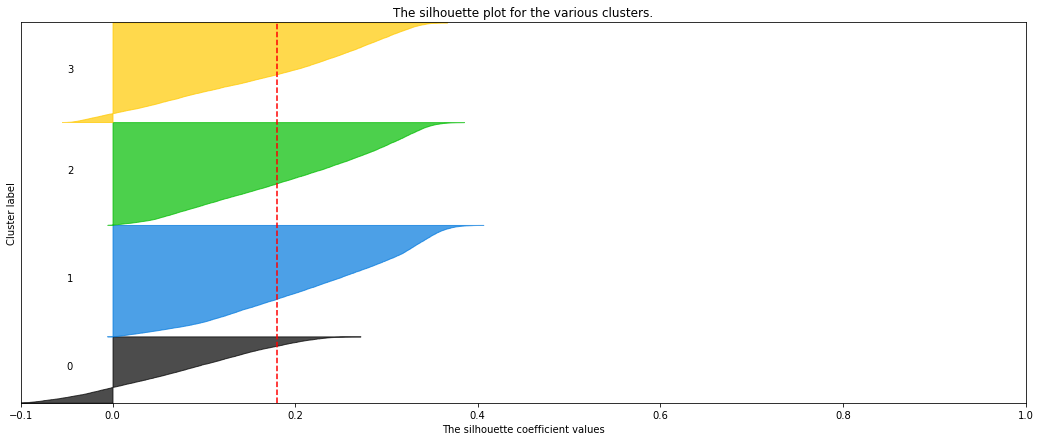

For n_clusters = 5 The average silhouette_score is : 0.16118442


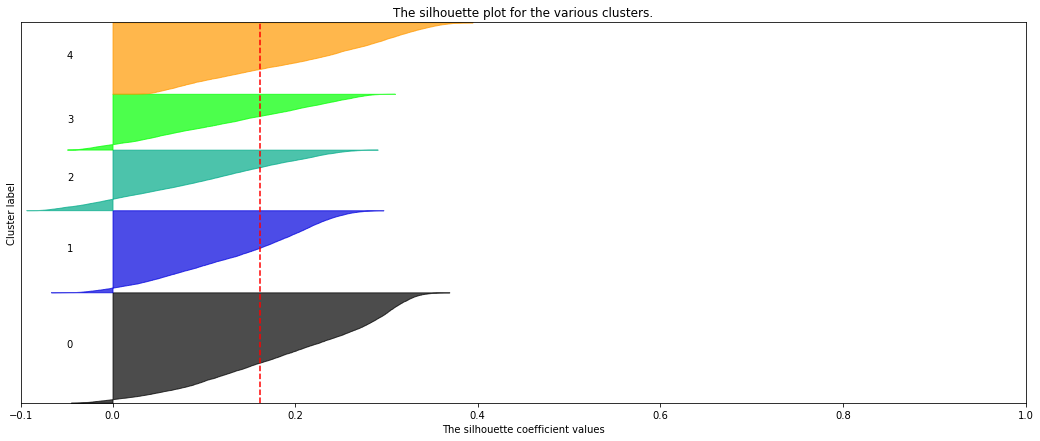

For n_clusters = 6 The average silhouette_score is : 0.15630263


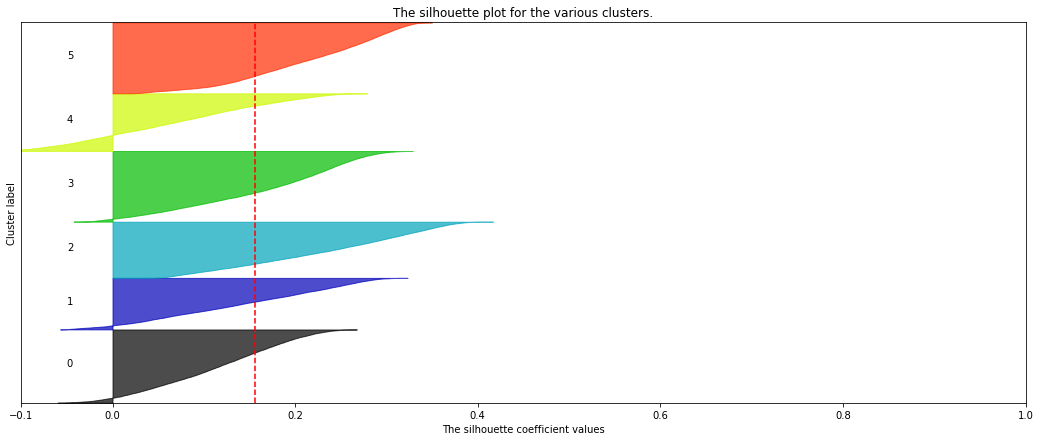

For n_clusters = 7 The average silhouette_score is : 0.16563977


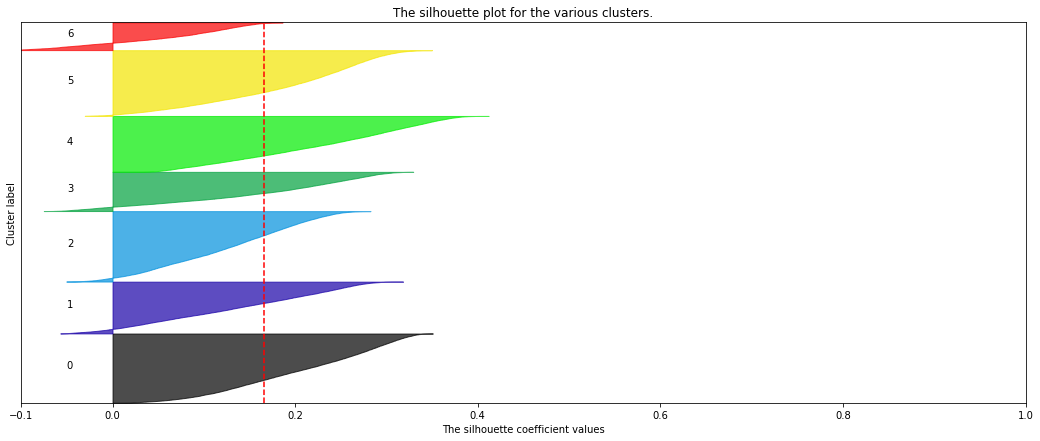

For n_clusters = 8 The average silhouette_score is : 0.15466781


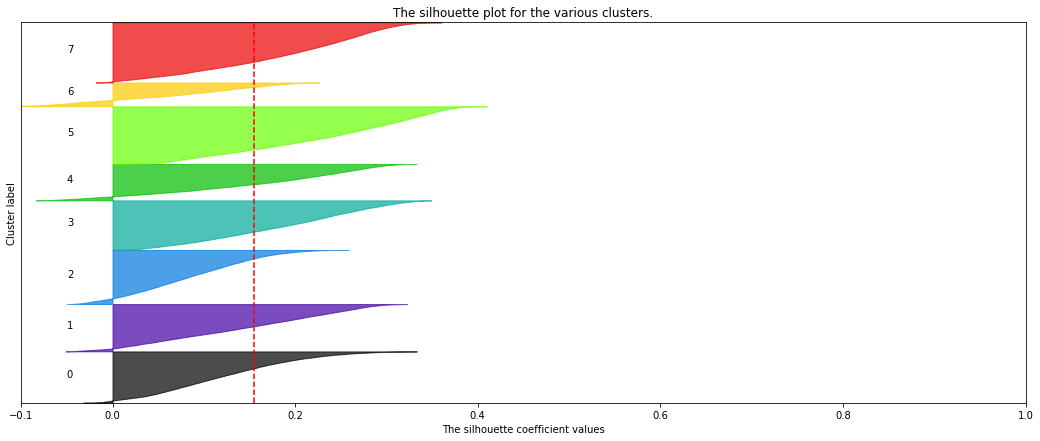

For n_clusters = 9 The average silhouette_score is : 0.16575886


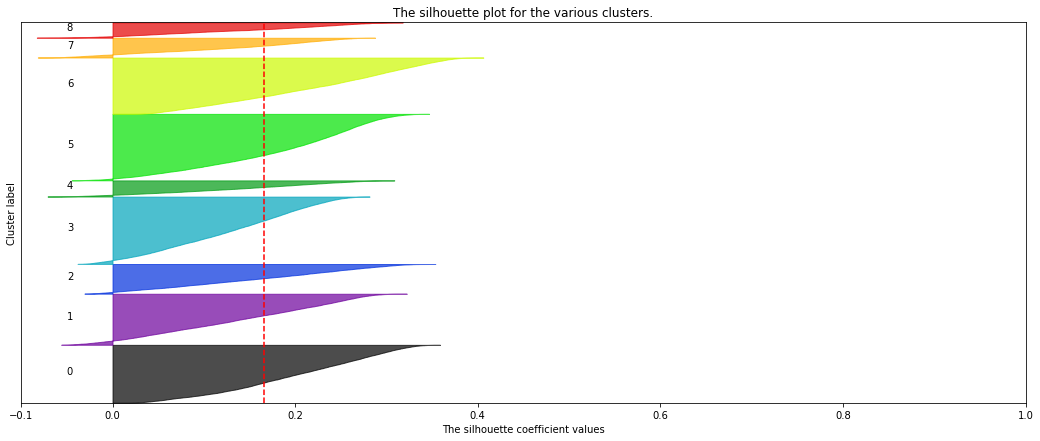

For n_clusters = 10 The average silhouette_score is : 0.15461722


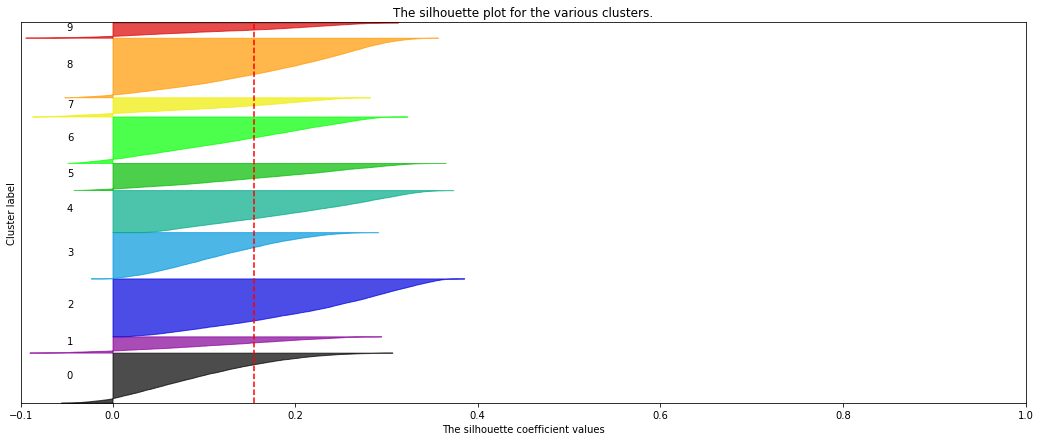

In [ ]:
silhouette(trainX,False,"euclidean","k-means++")

#### clearly the optimal number of clusters=2

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 21000 samples in 2.776s...
[t-SNE] Computed neighbors for 21000 samples in 813.645s...
[t-SNE] Computed conditional probabilities for sample 1000 / 21000
[t-SNE] Computed conditional probabilities for sample 2000 / 21000
[t-SNE] Computed conditional probabilities for sample 3000 / 21000
[t-SNE] Computed conditional probabilities for sample 4000 / 21000
[t-SNE] Computed conditional probabilities for sample 5000 / 21000
[t-SNE] Computed conditional probabilities for sample 6000 / 21000
[t-SNE] Computed conditional probabilities for sample 7000 / 21000
[t-SNE] Computed conditional probabilities for sample 8000 / 21000
[t-SNE] Computed conditional probabilities for sample 9000 / 21000
[t-SNE] Computed conditional probabilities for sample 10000 / 21000
[t-SNE] Computed conditional probabilities for sample 11000 / 21000
[t-SNE] Computed conditional probabilities for sample 12000 / 21000
[t-SNE] Computed conditional probabilities for 

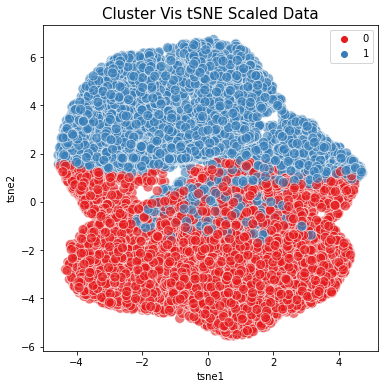

In [ ]:
visualise_tsne(testX,testy,2,False,"euclidean","k-means++")

## Observations:



1. Homogenous scores and inertia  are very similar to that of kmeans. 
2. silhoutte score on custom kmeans++ is slightly higher.
3. optimal number of clusters are also similar to that of kmeans




# Part2  Latent Space representation data set 

### Data Preprocessing

In [ ]:
df=pd.read_csv('data.csv') 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59999 entries, 0 to 59998
Columns: 193 entries, [1.0866963863372803 to  Ankle Boot
dtypes: float64(190), object(3)
memory usage: 88.3+ MB


In [ ]:
df.describe()

2.3719661235809326   5.534520626068115  ...   0.0.32   0.0.33
count         59999.000000        59999.000000  ...  59999.0  59999.0
mean              3.169725            2.828512  ...      0.0      0.0
std               1.647101            1.155585  ...      0.0      0.0
min               0.000000            0.000000  ...      0.0      0.0
25%               1.808442            1.949893  ...      0.0      0.0
50%               2.980381            2.882164  ...      0.0      0.0
75%               4.428799            3.605452  ...      0.0      0.0
max               7.103067            6.910887  ...      0.0      0.0

[8 rows x 190 columns]

In [ ]:
df.head(20)

[1.0866963863372803   2.3719661235809326  ...   0.0]   Ankle Boot
0    [5.086210250854492             3.526383  ...   0.0]      T-Shirt
1    [1.211804747581482             2.946491  ...   0.0]      T-Shirt
2   [3.1817357540130615             3.386448  ...   0.0]        Dress
3   [3.5364575386047363             5.801409  ...   0.0]      T-Shirt
4    [4.996546268463135             2.998642  ...   0.0]     Pullover
5   [0.8699365854263306             1.664445  ...   0.0]      Sneaker
6    [6.493982315063477             4.392028  ...   0.0]     Pullover
7   [0.2539845108985901             0.590083  ...   0.0]       Sandal
8   [0.3368522524833679             1.159658  ...   0.0]       Sandal
9     [4.48954963684082             3.483297  ...   0.0]      T-Shirt
10  [1.5901156663894653             3.922425  ...   0.0]   Ankle Boot
11  [1.3103128671646118             1.715600  ...   0.0]       Sandal
12  [0.9508031010627747             1.380167  ...   0.0]       Sandal
13  [0.6776222586631775             1.283091  ...   0.0]      Sneaker
14  [1.0888473987579346             2.340609  ...   0.0]   Ankle Boot
15  [2.6348624229431152             5.316164  ...   0.0]      Trouser
16   [4.926619052886963             4.339188  ...   0.0]      T-Shirt
17   [4.787083148956299             2.975790  ...   0.0]        Shirt
18  [1.9222091436386108             2.231691  ...   0.0]         Coat
19   [4.337490558624268             4.969725  ...   0.0]        Dress

[20 rows x 193 columns]

In [ ]:
df.dtypes

[1.0866963863372803     object
 2.3719661235809326    float64
 5.534520626068115     float64
 3.7711739540100098    float64
 1.877306580543518     float64
                        ...   
 0.0.31                float64
 0.0.32                float64
 0.0.33                float64
 0.0]                   object
 Ankle Boot             object
Length: 193, dtype: object

In [ ]:
df=df.dropna()

In [ ]:
 from sklearn import preprocessing

In [ ]:
x=df.values[:,:-1]
y=df.values[:,-1]

replace_map={" T-Shirt":0,"T-Shirt":0," top":0," Trouser":1," Pullover":2," Dress":3," Coat":4," Sandal":5," Shirt":6," Sneaker":7," Bag":8," Ankle Boot":9," Ankle boot":9}

y=y.tolist()
print(y)

y=[replace_map[k] for k in y]
y=np.array(y)
print(y)
print(np.shape(y))

trainX, testX = train_test_split(x, test_size=0.3)
trainy, testy = train_test_split(y, test_size=0.3)

trainX=trainX[:,1:-1]    ### dropping th object columns at the front and at the end 
testX=testX[:,1:-1]

print(trainX[:10,:])
print(np.shape(trainX))
print(np.shape(testX))
print(np.shape(trainy))
print(np.shape(testy))

[' T-Shirt', ' T-Shirt', ' Dress', ' T-Shirt', ' Pullover', ' Sneaker', ' Pullover', ' Sandal', ' Sandal', ' T-Shirt', ' Ankle Boot', ' Sandal', ' Sandal', ' Sneaker', ' Ankle Boot', ' Trouser', ' T-Shirt', ' Shirt', ' Coat', ' Dress', ' Trouser', ' Coat', ' Bag', ' Coat', ' Dress', ' T-Shirt', ' Pullover', ' Coat', ' Coat', ' Sandal', ' Dress', ' Shirt', ' Shirt', ' T-Shirt', ' Bag', ' Sandal', ' Pullover', ' Trouser', ' Shirt', ' Shirt', ' Sneaker', ' Ankle Boot', ' Sandal', ' Ankle Boot', ' Pullover', ' Sneaker', ' Dress', ' T-Shirt', ' Dress', ' Dress', ' Dress', ' Sneaker', ' Pullover', ' Pullover', ' Shirt', ' Shirt', ' Bag', ' Dress', ' Dress', ' Sandal', ' T-Shirt', ' Sandal', ' Sandal', ' T-Shirt', ' Pullover', ' T-Shirt', ' T-Shirt', ' Coat', ' Trouser', ' Dress', ' Trouser', ' Shirt', ' Dress', ' Trouser', ' Coat', ' Coat', ' Shirt', ' Trouser', ' Ankle Boot', ' Trouser', ' Dress', ' Sandal', ' Sneaker', ' Ankle Boot', ' Sneaker', ' Trouser', ' Sneaker', ' Ankle Boot', ' Ank

In [ ]:

'''
num_training = 5000
mask = list(range(num_training))
trainX = trainX[mask]
trainy = trainy[mask]


num_test = 500
mask = list(range(num_test))
testX = testX[mask]
testy = testy[mask]
'''

'\nnum_training = 5000\nmask = list(range(num_training))\ntrainX = trainX[mask]\ntrainy = trainy[mask]\n\n\nnum_test = 500\nmask = list(range(num_test))\ntestX = testX[mask]\ntesty = testy[mask]\n'

## Experimention on Kmeans

### Experimentaion using elbow on `custom` algorithms

Homogeneity score for k= 2 is 0.00012111498478336818 
 k= 2 over ->Homogeneity score for k= 3 is 0.00017435710130209487 
 k= 3 over ->Homogeneity score for k= 4 is 0.0002855030522004697 
 k= 4 over ->Homogeneity score for k= 5 is 0.0002419152294632834 
 k= 5 over ->Homogeneity score for k= 6 is 0.0003261360417876267 
 k= 6 over ->Homogeneity score for k= 7 is 0.0003387639317746555 
 k= 7 over ->Homogeneity score for k= 8 is 0.00044365873211657124 
 k= 8 over ->Homogeneity score for k= 9 is 0.00041710538646641114 
 k= 9 over ->Homogeneity score for k= 10 is 0.0005797225018594473 
 k= 10 over ->

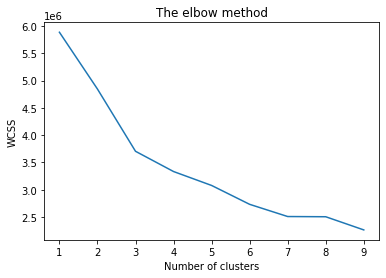

In [ ]:
elbow(trainX,trainy,True,"manhatten","forgy")

#### clearly optimal number of clusters=7

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 18000 samples in 0.605s...
[t-SNE] Computed neighbors for 18000 samples in 53.661s...
[t-SNE] Computed conditional probabilities for sample 1000 / 18000
[t-SNE] Computed conditional probabilities for sample 2000 / 18000
[t-SNE] Computed conditional probabilities for sample 3000 / 18000
[t-SNE] Computed conditional probabilities for sample 4000 / 18000
[t-SNE] Computed conditional probabilities for sample 5000 / 18000
[t-SNE] Computed conditional probabilities for sample 6000 / 18000
[t-SNE] Computed conditional probabilities for sample 7000 / 18000
[t-SNE] Computed conditional probabilities for sample 8000 / 18000
[t-SNE] Computed conditional probabilities for sample 9000 / 18000
[t-SNE] Computed conditional probabilities for sample 10000 / 18000
[t-SNE] Computed conditional probabilities for sample 11000 / 18000
[t-SNE] Computed conditional probabilities for sample 12000 / 18000
[t-SNE] Computed conditional probabilities for s

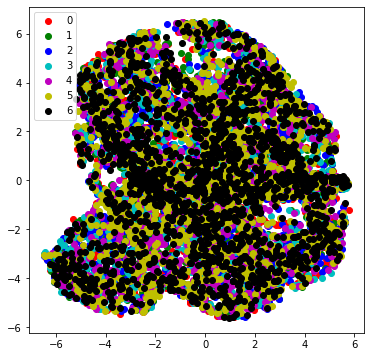

In [ ]:
visualise_tsne(testX,testy,7,True,"manhatten","forgy")

### Experimentation using sihoutte on `custom` algorithms

For n_clusters = 2 The average silhouette_score is: 0.3207
For n_clusters = 2 The average silhouette_score is : 0.3207405738323496


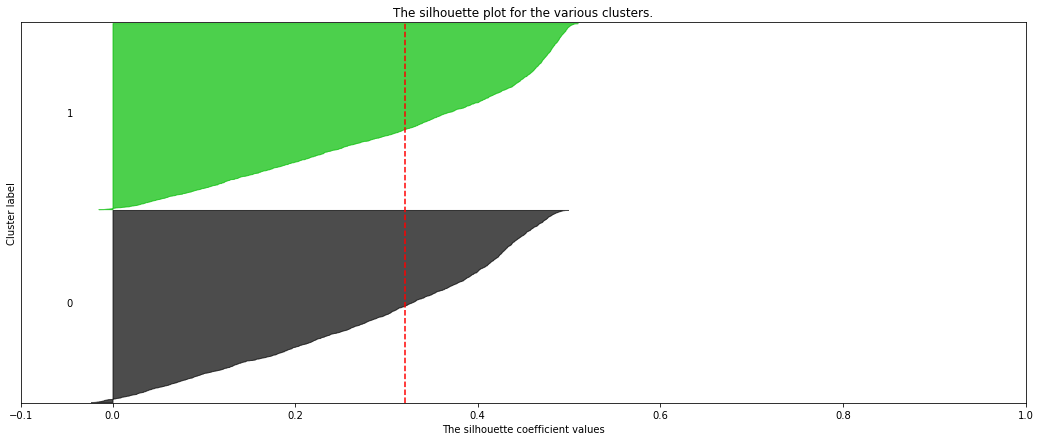

For n_clusters = 3 The average silhouette_score is: 0.3269
For n_clusters = 3 The average silhouette_score is : 0.32690242599670805


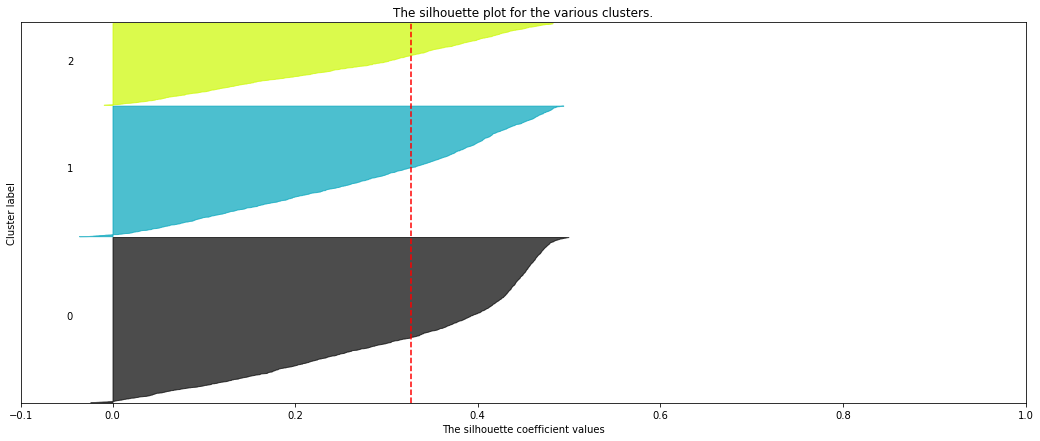

For n_clusters = 4 The average silhouette_score is: 0.3421
For n_clusters = 4 The average silhouette_score is : 0.342111305420317


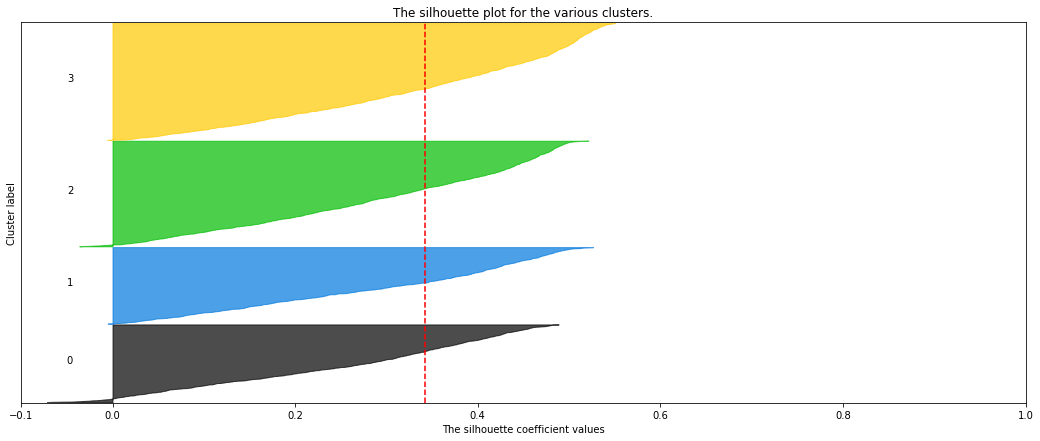

For n_clusters = 5 The average silhouette_score is: 0.3207
For n_clusters = 5 The average silhouette_score is : 0.32065414877556886


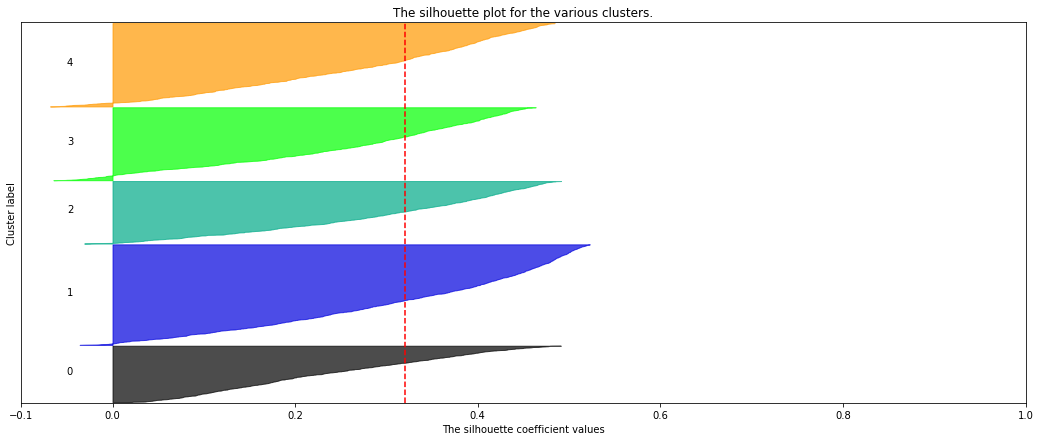

For n_clusters = 6 The average silhouette_score is: 0.3064
For n_clusters = 6 The average silhouette_score is : 0.30637593991410594


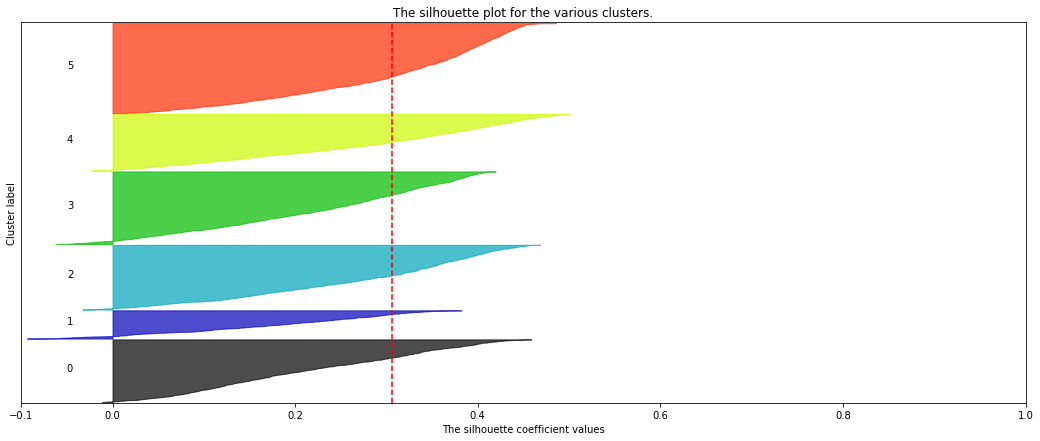

For n_clusters = 7 The average silhouette_score is: 0.3261
For n_clusters = 7 The average silhouette_score is : 0.32613885494483097


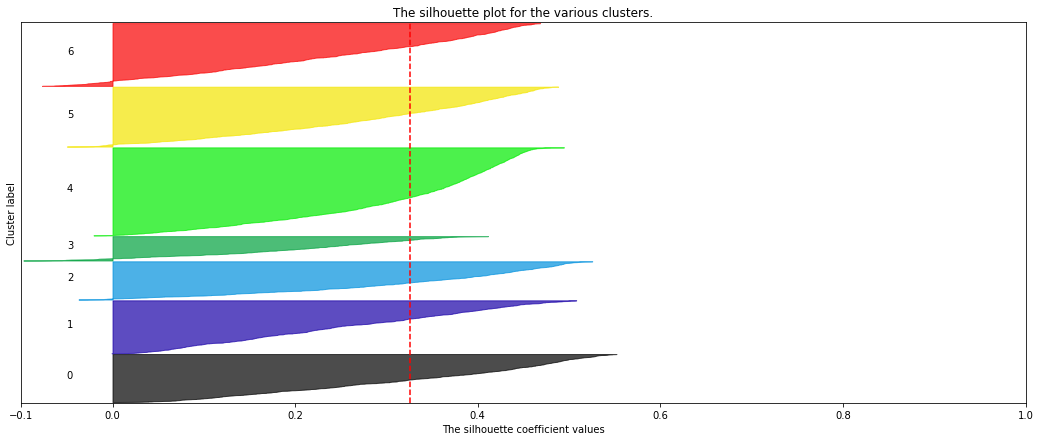

For n_clusters = 8 The average silhouette_score is: 0.3247
For n_clusters = 8 The average silhouette_score is : 0.32470882869011497


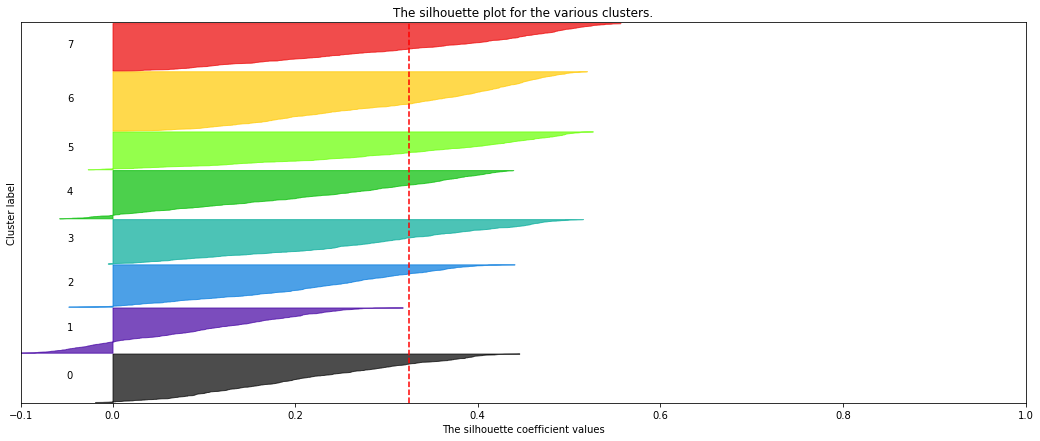

For n_clusters = 9 The average silhouette_score is: 0.3365
For n_clusters = 9 The average silhouette_score is : 0.3365143164769171


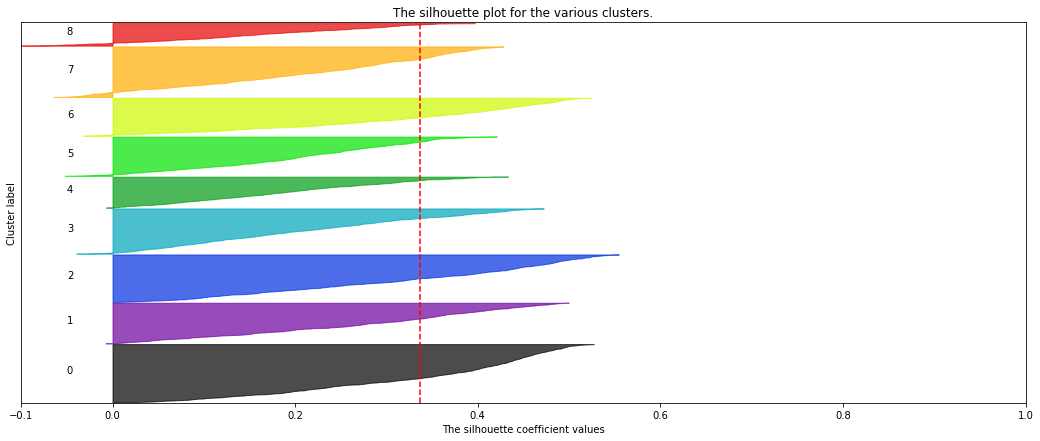

For n_clusters = 10 The average silhouette_score is: 0.339
For n_clusters = 10 The average silhouette_score is : 0.3390010910809726


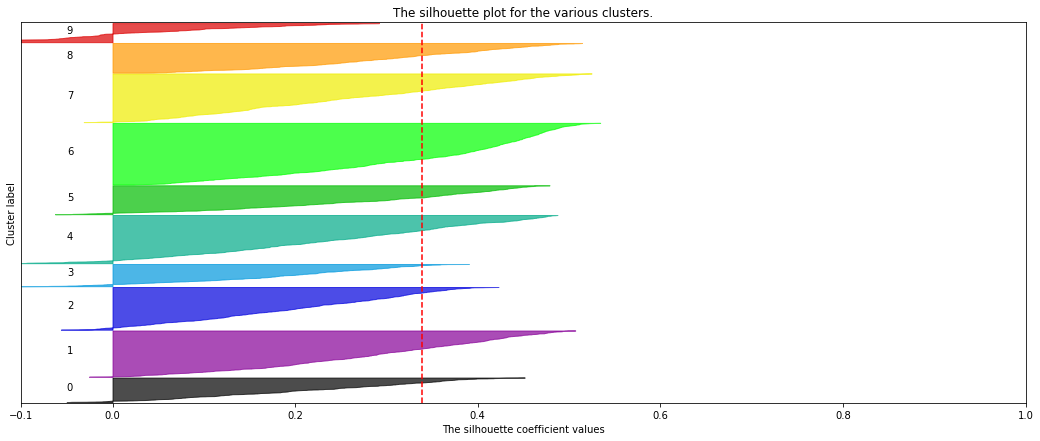

In [ ]:
silhouette(trainX,True,"euclidean","random_partition")

#### clearly the optimal number of clusters=4

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 500 samples in 0.010s...
[t-SNE] Computed neighbors for 500 samples in 0.114s...
[t-SNE] Computed conditional probabilities for sample 500 / 500
[t-SNE] Mean sigma: 5.060179
[t-SNE] KL divergence after 250 iterations with early exaggeration: 88.312836
[t-SNE] KL divergence after 300 iterations: 2.217752
Inertia(With in the cluster sum of squares) is 360880.01154387 


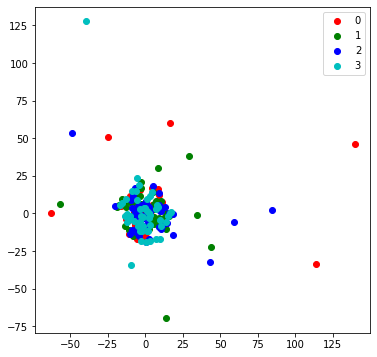

In [ ]:
visualise_tsne(testX,testy,4,True,"euclidean","random")

### Experimentation using `scikit and elbow` 

Homogeneity score for k= 2 is 0.0001728715482088405 
 k= 2 over ->Homogeneity score for k= 3 is 0.00025539599526465796 
 k= 3 over ->Homogeneity score for k= 4 is 0.00023834424423451568 
 k= 4 over ->Homogeneity score for k= 5 is 0.000230257402153067 
 k= 5 over ->Homogeneity score for k= 6 is 0.0002481575694574311 
 k= 6 over ->Homogeneity score for k= 7 is 0.00033558744055514037 
 k= 7 over ->Homogeneity score for k= 8 is 0.00039225258453494746 
 k= 8 over ->Homogeneity score for k= 9 is 0.0004753923964575795 
 k= 9 over ->Homogeneity score for k= 10 is 0.0004282993625806304 
 k= 10 over ->

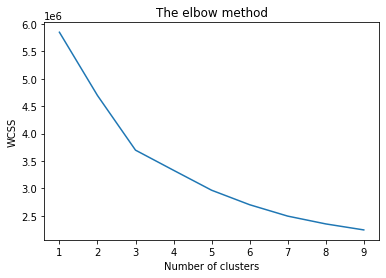

In [ ]:
elbow(trainX,trainy,False,"euclidean","forgy")

#### optimal number of clusters =6

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 18000 samples in 0.580s...
[t-SNE] Computed neighbors for 18000 samples in 49.699s...
[t-SNE] Computed conditional probabilities for sample 1000 / 18000
[t-SNE] Computed conditional probabilities for sample 2000 / 18000
[t-SNE] Computed conditional probabilities for sample 3000 / 18000
[t-SNE] Computed conditional probabilities for sample 4000 / 18000
[t-SNE] Computed conditional probabilities for sample 5000 / 18000
[t-SNE] Computed conditional probabilities for sample 6000 / 18000
[t-SNE] Computed conditional probabilities for sample 7000 / 18000
[t-SNE] Computed conditional probabilities for sample 8000 / 18000
[t-SNE] Computed conditional probabilities for sample 9000 / 18000
[t-SNE] Computed conditional probabilities for sample 10000 / 18000
[t-SNE] Computed conditional probabilities for sample 11000 / 18000
[t-SNE] Computed conditional probabilities for sample 12000 / 18000
[t-SNE] Computed conditional probabilities for s

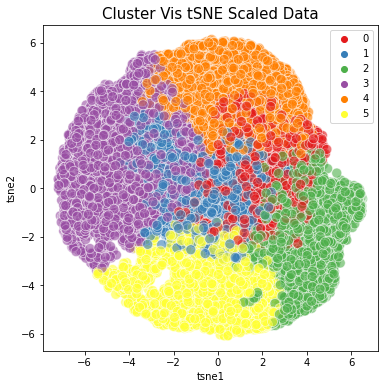

In [ ]:
visualise_tsne(testX,testy,6,False,"euclidean","random")

### Experimentation using `scikit and sihouette` 

For n_clusters = 2 The average silhouette_score is : 0.29948239298270923


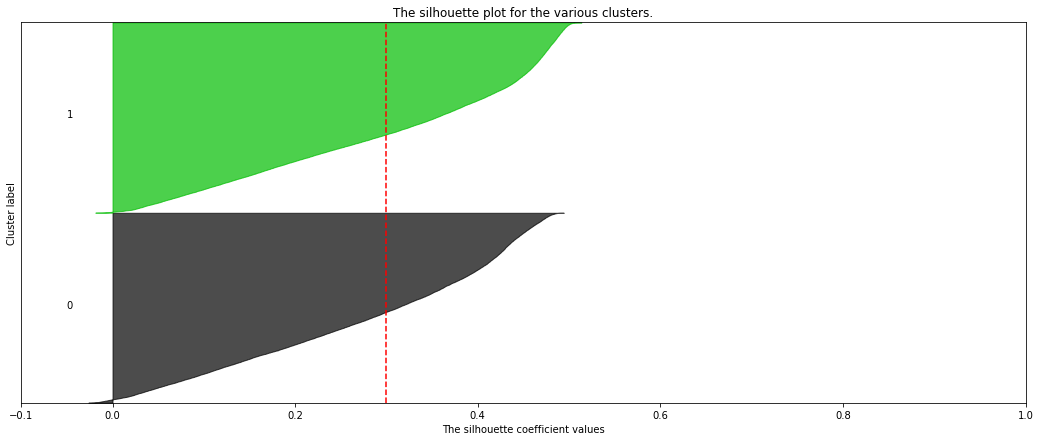

For n_clusters = 3 The average silhouette_score is : 0.2944368489860936


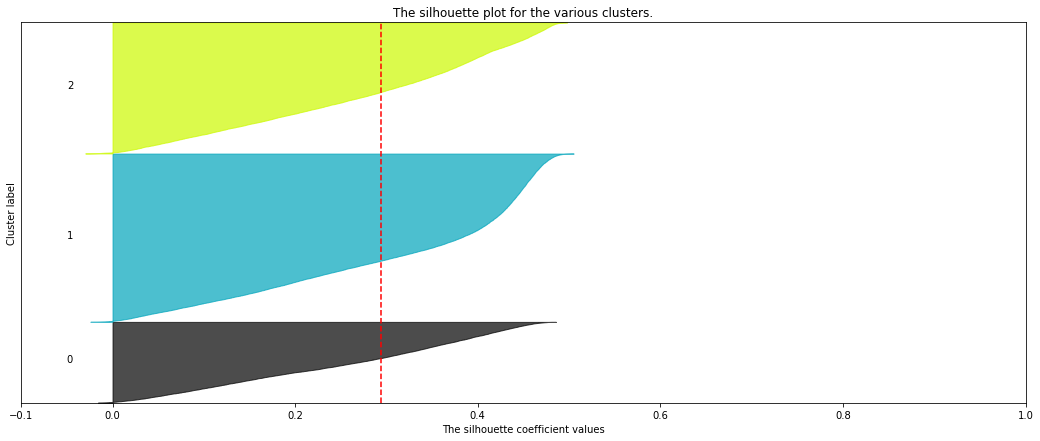

For n_clusters = 4 The average silhouette_score is : 0.2996053372668573


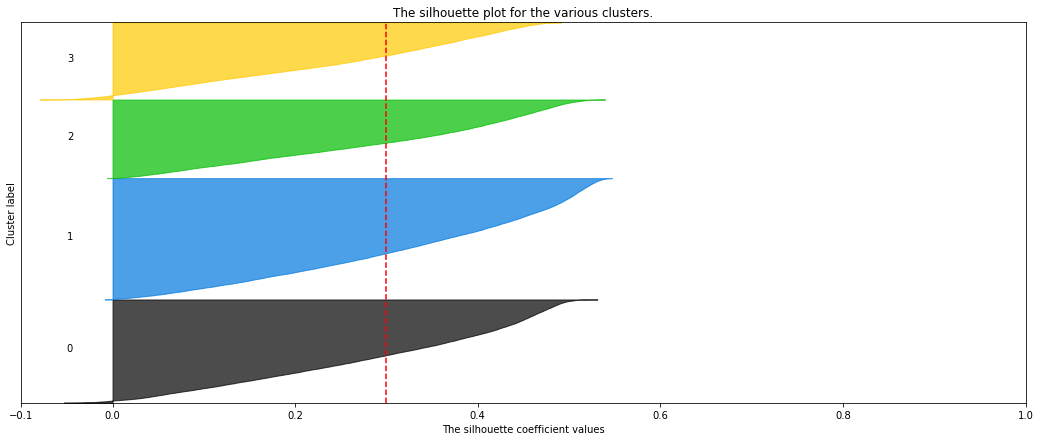

For n_clusters = 5 The average silhouette_score is : 0.2929061119484708


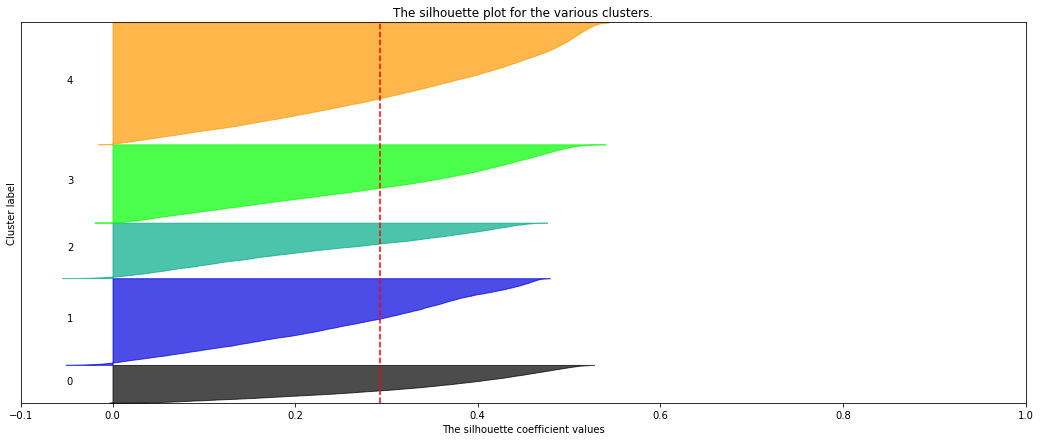

For n_clusters = 6 The average silhouette_score is : 0.28146010622853407


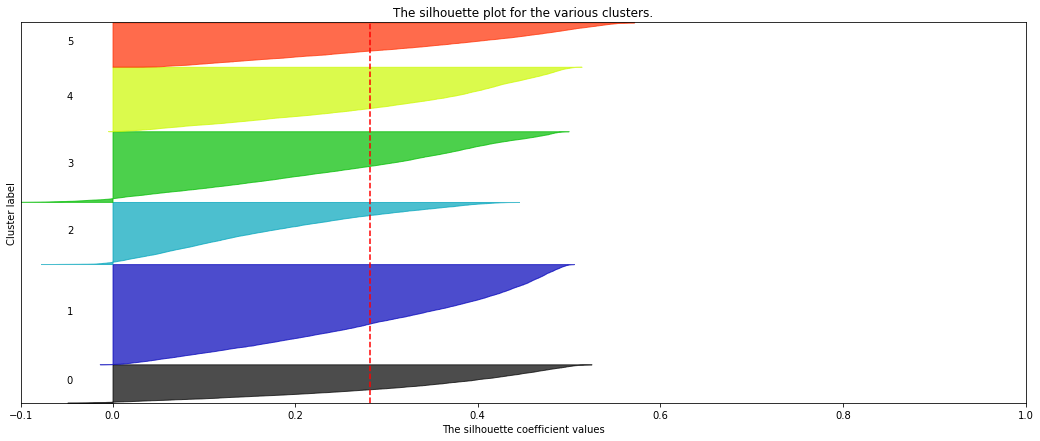

For n_clusters = 7 The average silhouette_score is : 0.26501970395165764


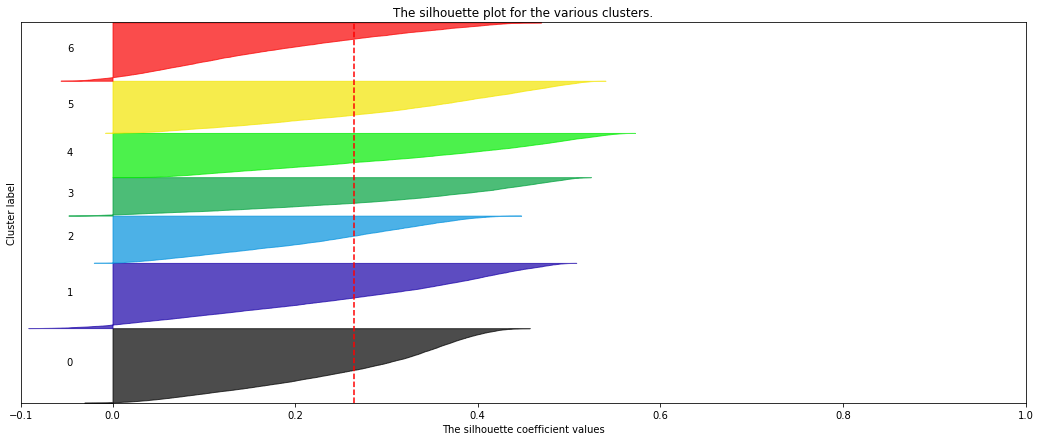

For n_clusters = 8 The average silhouette_score is : 0.27010458803570103


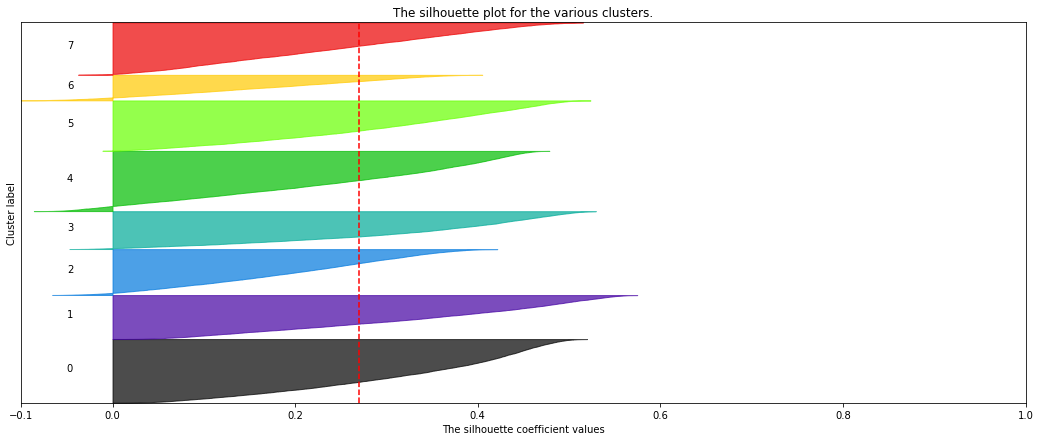

For n_clusters = 9 The average silhouette_score is : 0.2547082196119307


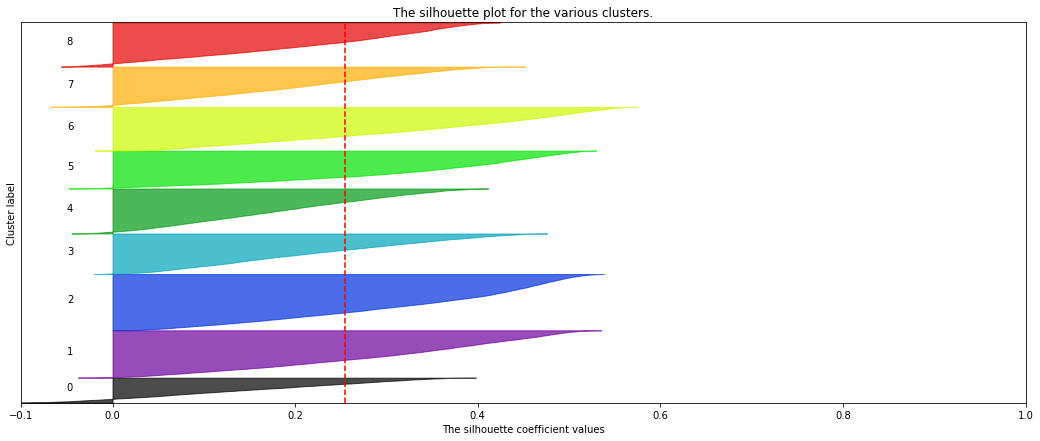

For n_clusters = 10 The average silhouette_score is : 0.25928041704019855


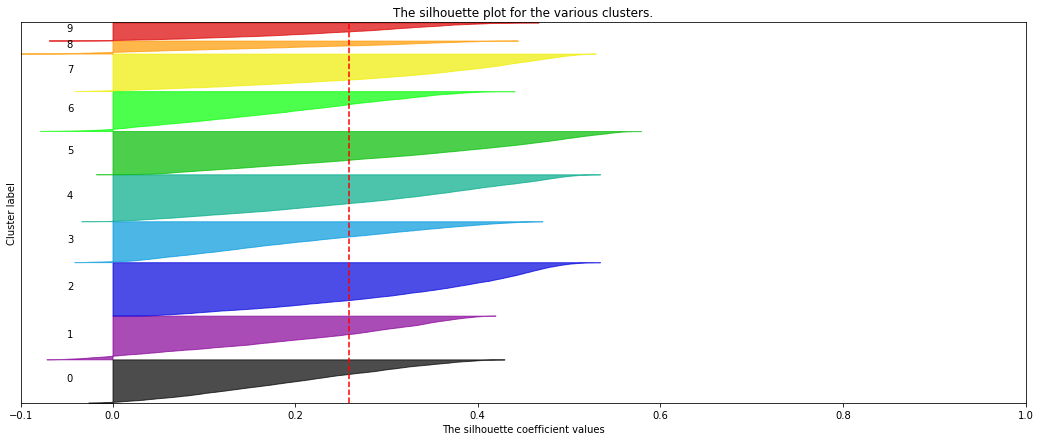

In [ ]:
silhouette(trainX,False,"euclidean","forgy")

#### clearly optimal clusters=4

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 18000 samples in 0.789s...
[t-SNE] Computed neighbors for 18000 samples in 57.282s...
[t-SNE] Computed conditional probabilities for sample 1000 / 18000
[t-SNE] Computed conditional probabilities for sample 2000 / 18000
[t-SNE] Computed conditional probabilities for sample 3000 / 18000
[t-SNE] Computed conditional probabilities for sample 4000 / 18000
[t-SNE] Computed conditional probabilities for sample 5000 / 18000
[t-SNE] Computed conditional probabilities for sample 6000 / 18000
[t-SNE] Computed conditional probabilities for sample 7000 / 18000
[t-SNE] Computed conditional probabilities for sample 8000 / 18000
[t-SNE] Computed conditional probabilities for sample 9000 / 18000
[t-SNE] Computed conditional probabilities for sample 10000 / 18000
[t-SNE] Computed conditional probabilities for sample 11000 / 18000
[t-SNE] Computed conditional probabilities for sample 12000 / 18000
[t-SNE] Computed conditional probabilities for s

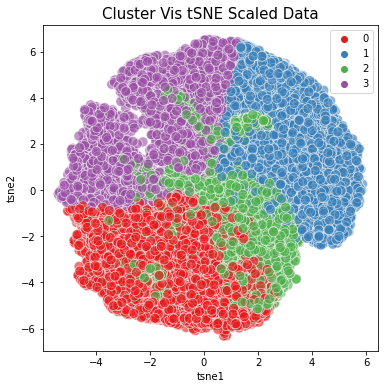

In [ ]:
visualise_tsne(testX,testy,4,False,"euclidean","random")

## Experimentation on Kmeans++

### Experimentation using elbow on `custom kmeans++` algorithms

Homogeneity score for k= 2 is 0.0001728715482088405 
 k= 2 over ->Homogeneity score for k= 3 is 0.00024013233508919375 
 k= 3 over ->Homogeneity score for k= 4 is 0.00023812309014019316 
 k= 4 over ->Homogeneity score for k= 5 is 0.00022746503332157393 
 k= 5 over ->Homogeneity score for k= 6 is 0.00025097843890551817 
 k= 6 over ->Homogeneity score for k= 7 is 0.00035752072550230543 
 k= 7 over ->Homogeneity score for k= 8 is 0.00041156777698575807 
 k= 8 over ->Homogeneity score for k= 9 is 0.00043363553043927186 
 k= 9 over ->Homogeneity score for k= 10 is 0.00043664538427706236 
 k= 10 over ->

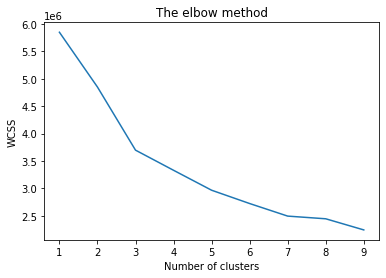

In [ ]:
elbow(trainX,trainy,True,"euclidean","k-means++")

#### optimal clusters=7

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 18000 samples in 0.590s...
[t-SNE] Computed neighbors for 18000 samples in 53.414s...
[t-SNE] Computed conditional probabilities for sample 1000 / 18000
[t-SNE] Computed conditional probabilities for sample 2000 / 18000
[t-SNE] Computed conditional probabilities for sample 3000 / 18000
[t-SNE] Computed conditional probabilities for sample 4000 / 18000
[t-SNE] Computed conditional probabilities for sample 5000 / 18000
[t-SNE] Computed conditional probabilities for sample 6000 / 18000
[t-SNE] Computed conditional probabilities for sample 7000 / 18000
[t-SNE] Computed conditional probabilities for sample 8000 / 18000
[t-SNE] Computed conditional probabilities for sample 9000 / 18000
[t-SNE] Computed conditional probabilities for sample 10000 / 18000
[t-SNE] Computed conditional probabilities for sample 11000 / 18000
[t-SNE] Computed conditional probabilities for sample 12000 / 18000
[t-SNE] Computed conditional probabilities for s

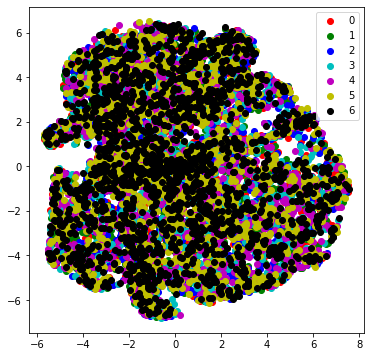

In [ ]:
visualise_tsne(testX,testy,7,True,"euclidean","k-means++")

### Experiment using silhouette on `custom kmeans++` algorithms  

For n_clusters = 2 The average silhouette_score is: 0.3235
For n_clusters = 2 The average silhouette_score is : 0.3234611315786208


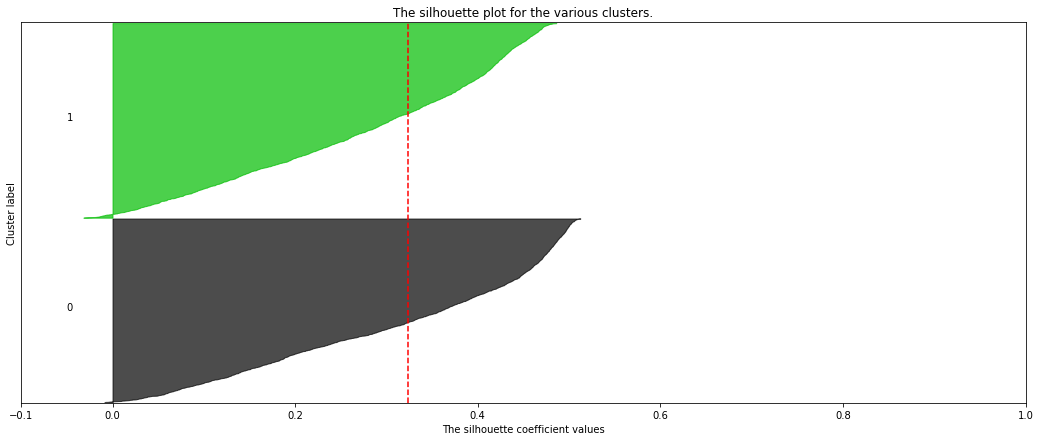

For n_clusters = 3 The average silhouette_score is: 0.3847
For n_clusters = 3 The average silhouette_score is : 0.3847217916842314


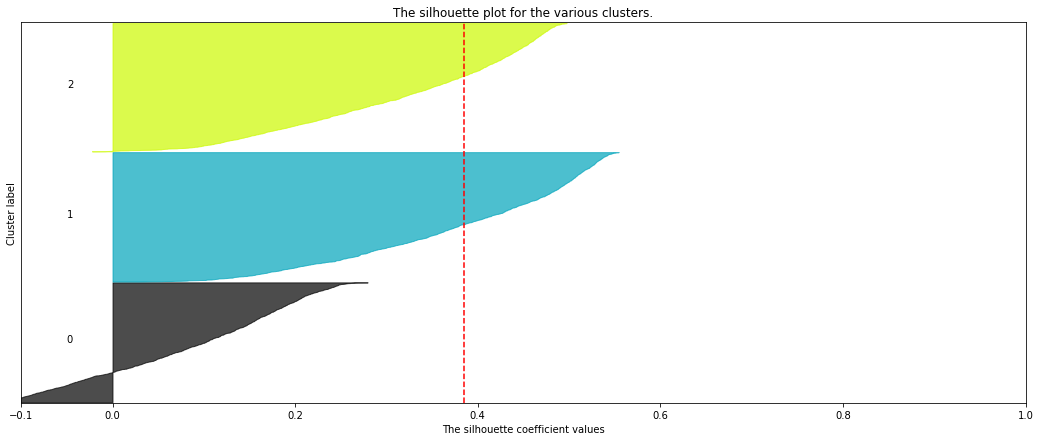

For n_clusters = 4 The average silhouette_score is: 0.3427
For n_clusters = 4 The average silhouette_score is : 0.34266692523695264


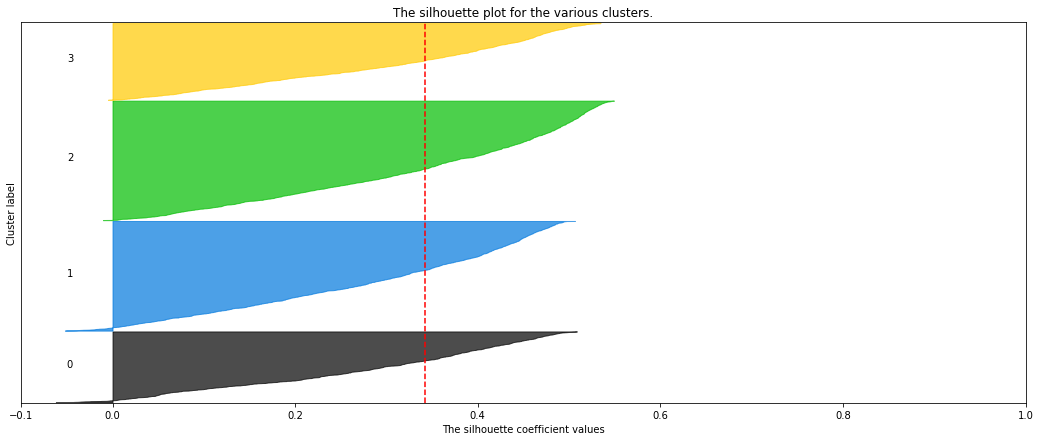

For n_clusters = 5 The average silhouette_score is: 0.3347
For n_clusters = 5 The average silhouette_score is : 0.33472502167151097


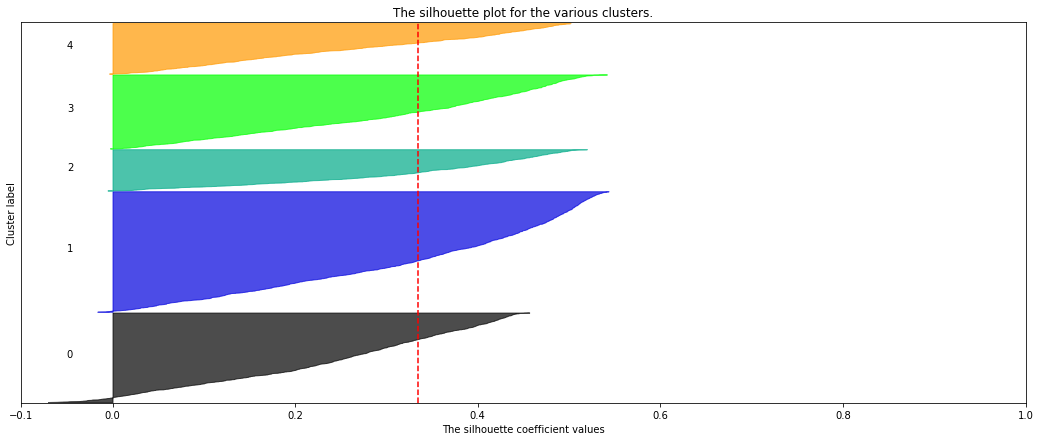

For n_clusters = 6 The average silhouette_score is: 0.3402
For n_clusters = 6 The average silhouette_score is : 0.3401645078477466


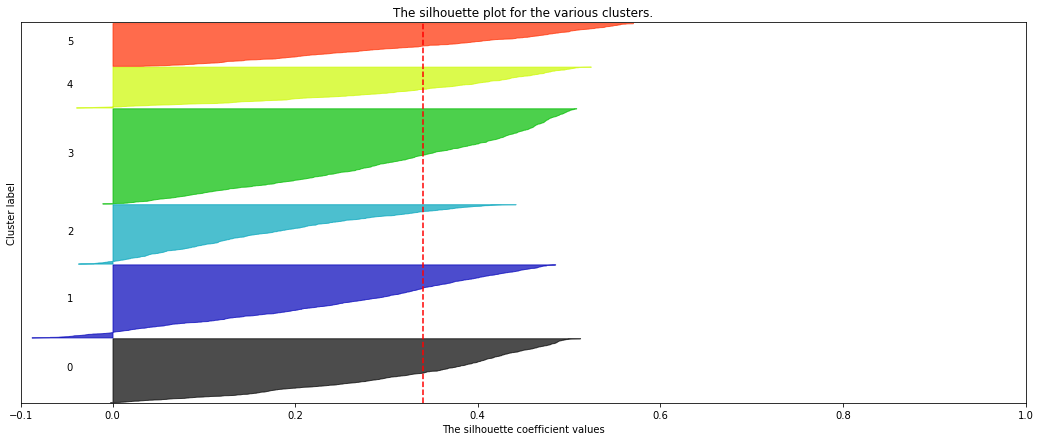

For n_clusters = 7 The average silhouette_score is: 0.3412
For n_clusters = 7 The average silhouette_score is : 0.3411580195623621


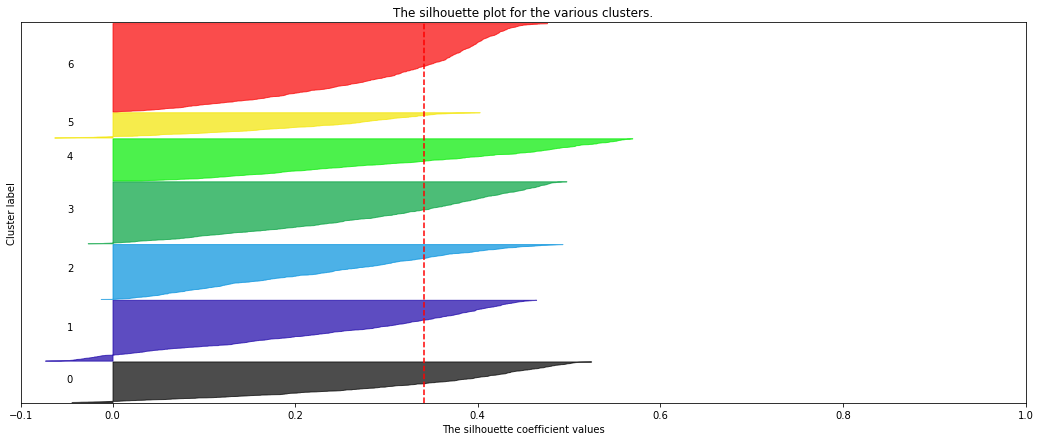

In [ ]:
silhouette(trainX,True,"euclidean","k-means++")

#### optimal clusters=4

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 500 samples in 0.009s...
[t-SNE] Computed neighbors for 500 samples in 0.115s...
[t-SNE] Computed conditional probabilities for sample 500 / 500
[t-SNE] Mean sigma: 4.880711
[t-SNE] KL divergence after 250 iterations with early exaggeration: 87.823563
[t-SNE] KL divergence after 300 iterations: 2.255242
Inertia(With in the cluster sum of squares) is 315054.0458741188 


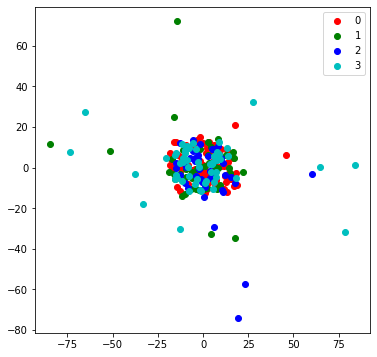

In [ ]:
visualise_tsne(testX,testy,4,True,"euclidean","k-means++")

### Experimentaion on `scikit-k-means++` elbow method

Homogeneity score for k= 2 is 8.67620610087136e-05 
 k= 2 over ->Homogeneity score for k= 3 is 0.00019267271783228576 
 k= 3 over ->Homogeneity score for k= 4 is 0.0002545965678659829 
 k= 4 over ->Homogeneity score for k= 5 is 0.00022569834007791386 
 k= 5 over ->Homogeneity score for k= 6 is 0.0002947404880226214 
 k= 6 over ->Homogeneity score for k= 7 is 0.0002993543606508799 
 k= 7 over ->Homogeneity score for k= 8 is 0.0003226801901685805 
 k= 8 over ->Homogeneity score for k= 9 is 0.0004072265273767151 
 k= 9 over ->Homogeneity score for k= 10 is 0.0005449056010401336 
 k= 10 over ->

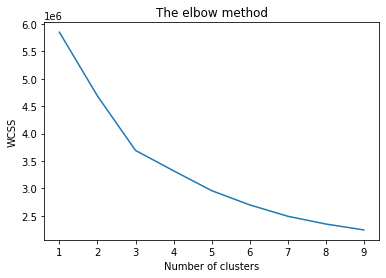

In [ ]:
elbow(trainX,trainy,False,"euclidean","k-means++")

#### optimal clusters k=6

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 18000 samples in 0.581s...
[t-SNE] Computed neighbors for 18000 samples in 50.987s...
[t-SNE] Computed conditional probabilities for sample 1000 / 18000
[t-SNE] Computed conditional probabilities for sample 2000 / 18000
[t-SNE] Computed conditional probabilities for sample 3000 / 18000
[t-SNE] Computed conditional probabilities for sample 4000 / 18000
[t-SNE] Computed conditional probabilities for sample 5000 / 18000
[t-SNE] Computed conditional probabilities for sample 6000 / 18000
[t-SNE] Computed conditional probabilities for sample 7000 / 18000
[t-SNE] Computed conditional probabilities for sample 8000 / 18000
[t-SNE] Computed conditional probabilities for sample 9000 / 18000
[t-SNE] Computed conditional probabilities for sample 10000 / 18000
[t-SNE] Computed conditional probabilities for sample 11000 / 18000
[t-SNE] Computed conditional probabilities for sample 12000 / 18000
[t-SNE] Computed conditional probabilities for s

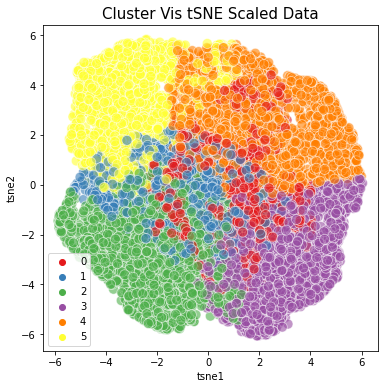

In [ ]:
visualise_tsne(testX,testy,6,False,"euclidean","k-means++")

### Experimentation on `scikit-k-means++` silhouette method

For n_clusters = 2 The average silhouette_score is : 0.299759327368454


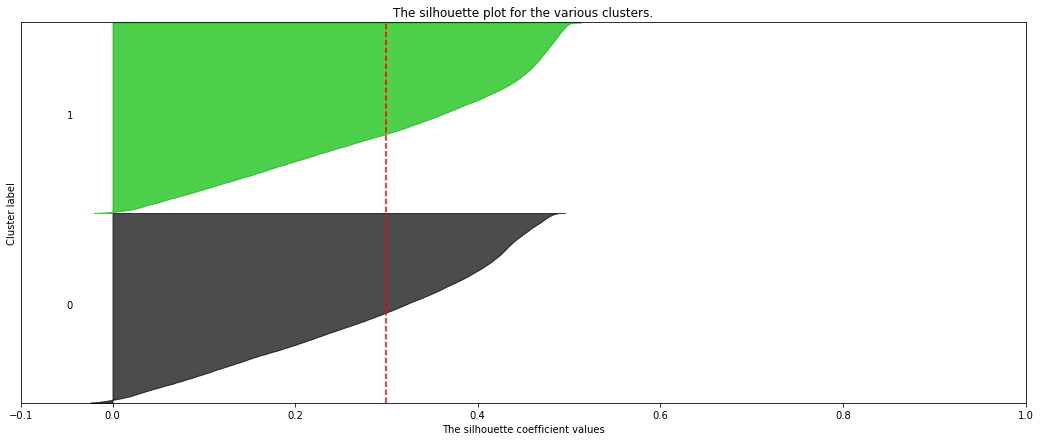

For n_clusters = 3 The average silhouette_score is : 0.29586731517176085


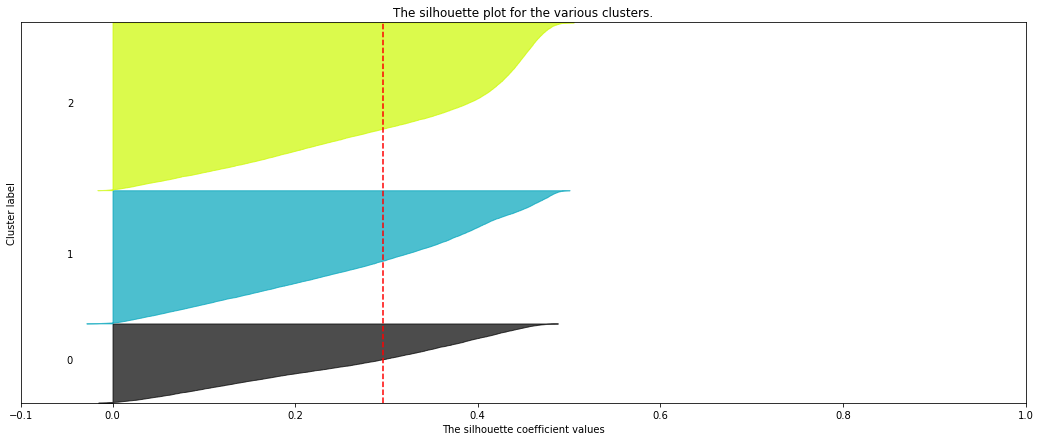

For n_clusters = 4 The average silhouette_score is : 0.300678765556456


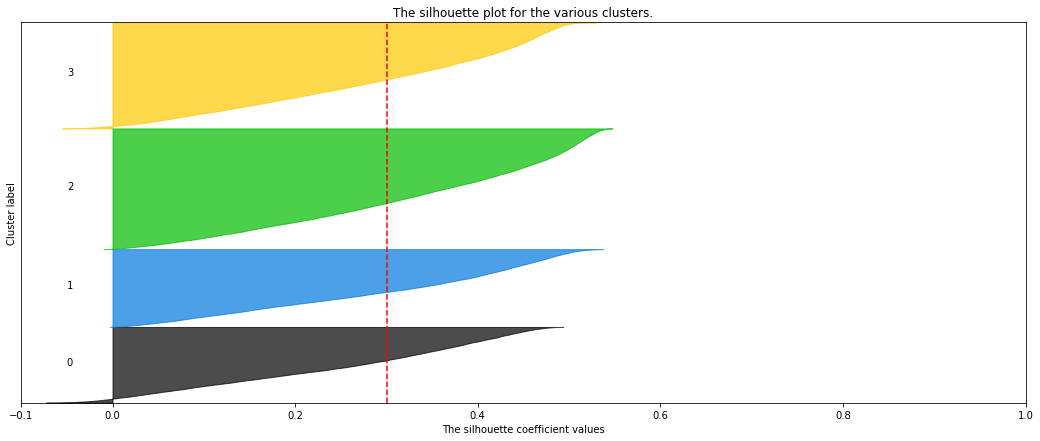

For n_clusters = 5 The average silhouette_score is : 0.2768214367732736


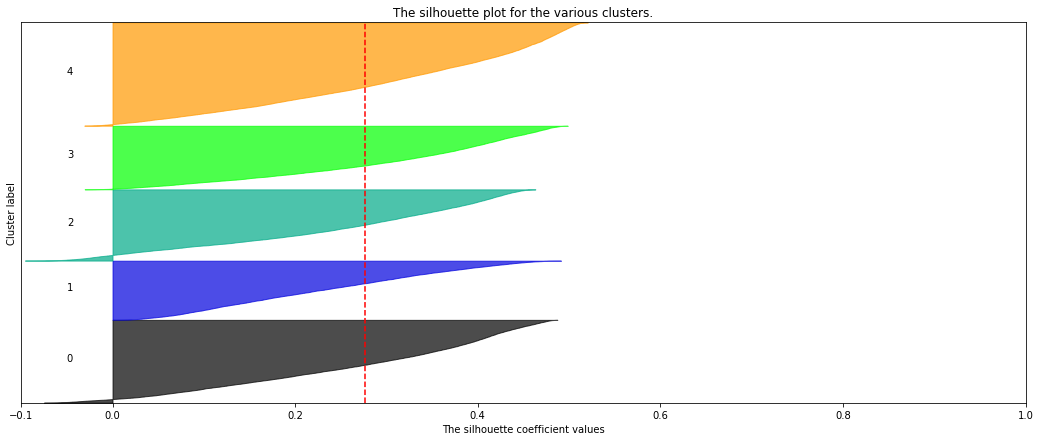

For n_clusters = 6 The average silhouette_score is : 0.2823717246235317


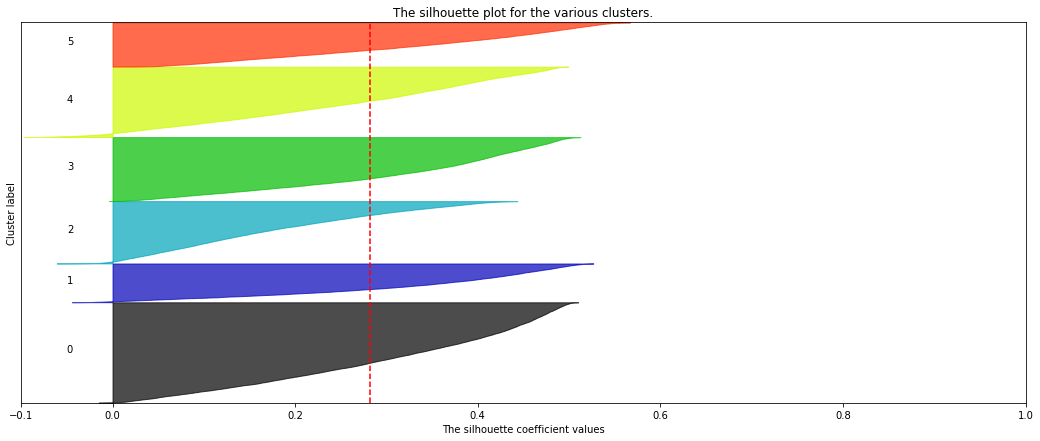

For n_clusters = 7 The average silhouette_score is : 0.26447092546663403


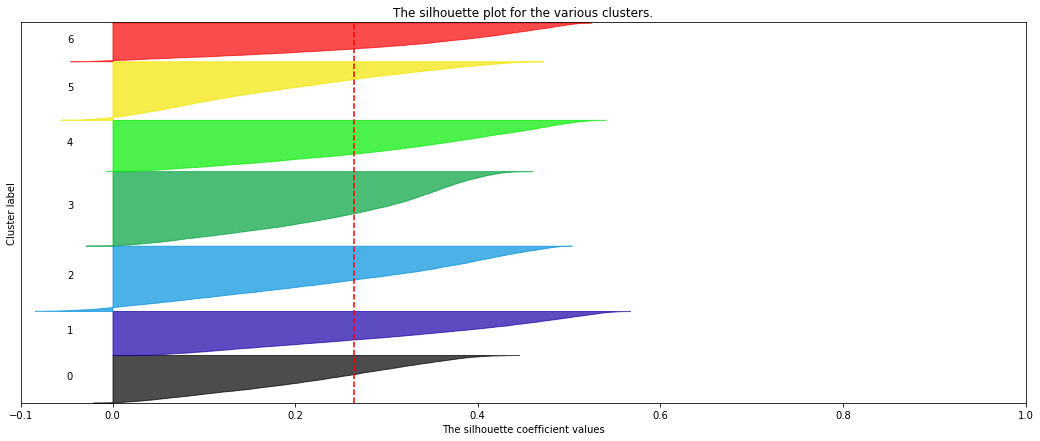

For n_clusters = 8 The average silhouette_score is : 0.2704013695916996


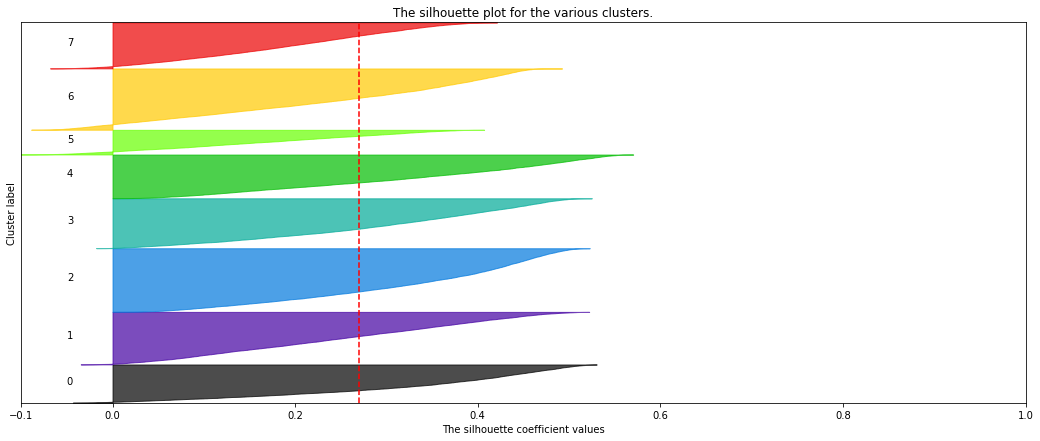

For n_clusters = 9 The average silhouette_score is : 0.25481098498026455


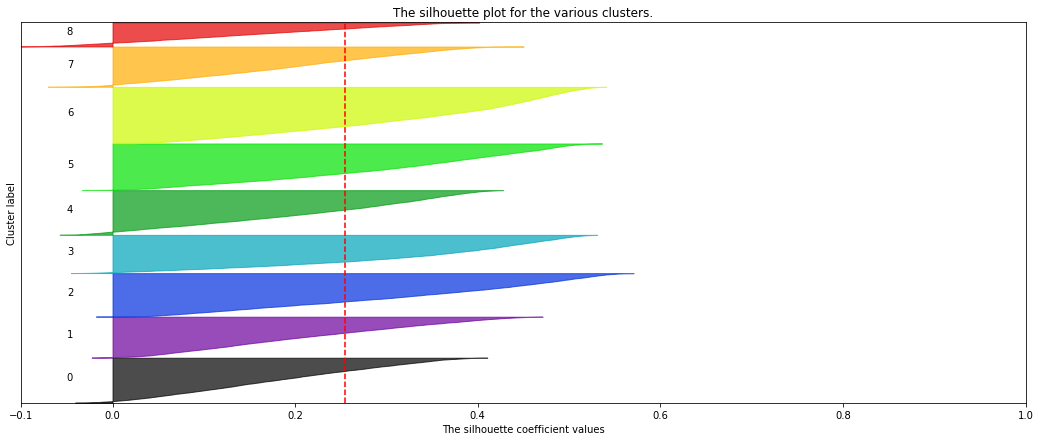

For n_clusters = 10 The average silhouette_score is : 0.2585200373043412


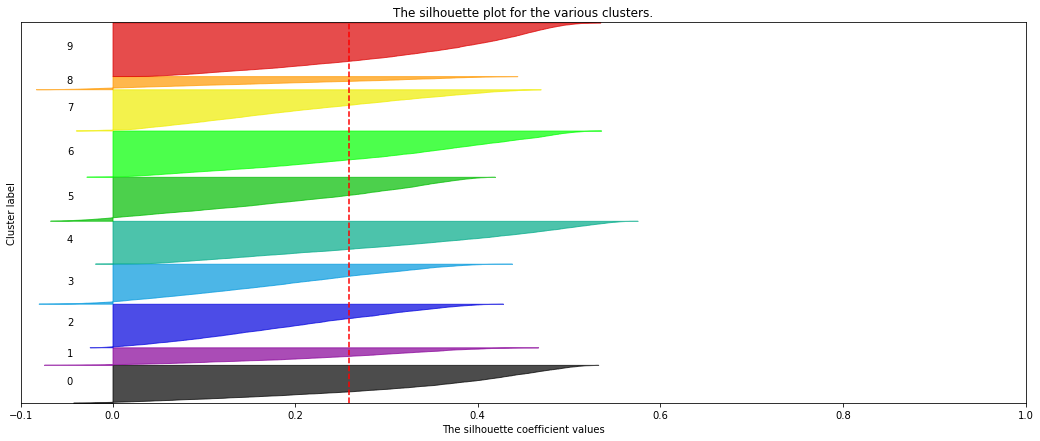

In [ ]:
silhouette(trainX,False,"euclidean","k-means++")

#### optimal cluster k=4

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 18000 samples in 0.549s...
[t-SNE] Computed neighbors for 18000 samples in 48.231s...
[t-SNE] Computed conditional probabilities for sample 1000 / 18000
[t-SNE] Computed conditional probabilities for sample 2000 / 18000
[t-SNE] Computed conditional probabilities for sample 3000 / 18000
[t-SNE] Computed conditional probabilities for sample 4000 / 18000
[t-SNE] Computed conditional probabilities for sample 5000 / 18000
[t-SNE] Computed conditional probabilities for sample 6000 / 18000
[t-SNE] Computed conditional probabilities for sample 7000 / 18000
[t-SNE] Computed conditional probabilities for sample 8000 / 18000
[t-SNE] Computed conditional probabilities for sample 9000 / 18000
[t-SNE] Computed conditional probabilities for sample 10000 / 18000
[t-SNE] Computed conditional probabilities for sample 11000 / 18000
[t-SNE] Computed conditional probabilities for sample 12000 / 18000
[t-SNE] Computed conditional probabilities for s

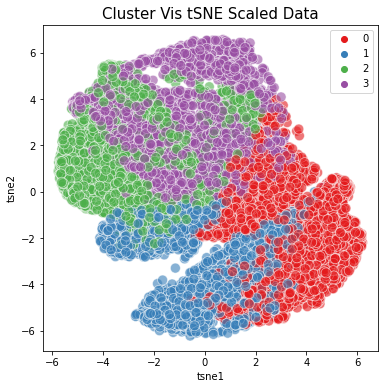

In [ ]:
visualise_tsne(testX,testy,4,False,"euclidean","k-means++")

## Observation latent space vs Normal data set:


1.   Homogenous scores on the latent data representation is very small compared to the original dataset.
2.  Tsne visualisation is very quick compared to the former data set.
3. Elbow method is fast and the optimal number of clusters formed are very similar.
4. silhouette method is very slow on the latent space representation. But the silhoutte scores increased slightly compared to the former representation.
5. silhoutte method on custom alogithm is bit faster on latter dataset  compared to the former. I presume it is due to decrease in large number of dimensions.


